In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import scipy.stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
from scipy import stats

دیتای اولیه شرکت ایر بی اند بی شامل دیتای افرادی در محله های مختلف نیویورک است که خانه های خود را به افراد بومی نیویورک یا مسافران یا توریست ها یا افرادی ه برای کار به نیویرک میایند و کاری بازه ای انجام میدهند و برای اقامت خانه این افراد را اجاره میکنند 
ابتدا مقداری تحلیل های معمولی و بیسیک رو بررسی میکنیم سپس بدنبال ارتباط های پنهان م مخفی توی دیتا ها و روابط مختلف اون ها میپردازیم و نتایجی که تونستیم از دیتا ها بگیریم رو نشون میدیم 


In [2]:
data = pd.read_csv('../datasets/AB_NYC_2019.csv')

In [3]:
data.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64

نوع های مختلف دیتاهایی که توی دیتا سیت داریم به شرح زیر هست و به ترتیب بر اساس هرنوعی که این دیتا ها دارن توی مراحل بعدی و مراحل ویژوال کردن باهاشون برخورد میکنیم

### numerical -> id, host_id, latitude, longitude, price, minimum_nights, number_of_reviews,
###              reviews_per_month, calculated_host_listings_count, availability_365

### categorical -> room_type

### not_sure -> name, host_name, neighbourhood_group, neighbourhood, last_review

در مرحله اول که شروع به بررسی مقادیر فیچر ها کردیم متوجه چند اسم میزبان نا مشخص شدیم سعی 
ایده این بود که شاید یک هاست توی یک رکورد اسمش ثبت نشده باشه و بتونیم از سطر های دیگمون این مقادیر رو پر کنیم ولی وقتی چکش کردیم متوجه شدیم که اینطوری نیست 
و ساختار دیتا بیسشون احتمال زیاد رابطه ای هست و اگر مقداری نال ثبت شده باشه کلا توی هیچ تیبلی نمیشه داشتش و حدس میزنیم که این افراد یا یک شرکت کوچک هستند . در کار اجاره خانه بوده اند قبل از شروع ایر بی اند بی هستند و اسم نداشتن و موقعی که به سیستم اضافه شدن اسمی ثبت نکردن 
یا شاید از اولین هاست ها بودن و سیستم ولیدیشن دیتا نداشتن اون موقع 

نکته دیگه ای ک متوجه شدیم وجود یه حجم خوبی نال توی فیچر تعداد ریویو در ماه و اخرین ریویو شدیم 
و بدون اینکه از ارتباط این رکورد ها با خبربشیم تصمیم گرفتیم که این فیچر هارو دراپ کنیم 
البته چون در اینده هم ایده ای روی این ۲ تا فیچر نزدیم سعی نکردیم مقادری رو پیش بینی کنیم و به دراپ کردن فیچر ها بسنده کردیم 


In [11]:
data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [12]:
print (data['id'].nunique(),len(data))

48895 48895


we can drop id

In [13]:
print (data['host_id'].nunique(),len(data))

37457 48895


In [14]:
host_ids=data.loc[data['host_name'].isnull()]['host_id']
for id  in host_ids:
    display(data.loc[data['host_id'] == id])
    

id       name  host_id host_name neighbourhood_group   neighbourhood  \
360  100184  Bienvenue   526653       NaN              Queens  Queens Village   

     latitude  longitude     room_type  price  minimum_nights  \
360  40.72413  -73.76133  Private room     50               1   

     number_of_reviews last_review  reviews_per_month  \
360                 43  2019-07-08               0.45   

     calculated_host_listings_count  availability_365  
360                               1                88

id                     name  host_id host_name neighbourhood_group  \
2700  1449546  Cozy Studio in Flatbush  7779204       NaN            Brooklyn   

     neighbourhood  latitude  longitude        room_type  price  \
2700      Flatbush  40.64965  -73.96154  Entire home/apt    100   

      minimum_nights  number_of_reviews last_review  reviews_per_month  \
2700              30                 49  2017-01-02               0.69   

      calculated_host_listings_count  availability_365  
2700                               1               342

id                                             name  host_id  \
5745  4183989  SPRING in the City!! Zen-Style Tranquil Bedroom   919218   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
5745       NaN           Manhattan        Harlem  40.80606  -73.95061   

         room_type  price  minimum_nights  number_of_reviews last_review  \
5745  Private room     86               3                 34  2019-05-23   

      reviews_per_month  calculated_host_listings_count  availability_365  
5745                1.0                               1               359

id                                name   host_id host_name  \
6075  4446862  Charming Room in Prospect Heights!  23077718       NaN   

     neighbourhood_group  neighbourhood  latitude  longitude     room_type  \
6075            Brooklyn  Crown Heights  40.67512  -73.96146  Private room   

      price  minimum_nights  number_of_reviews last_review  reviews_per_month  \
6075     50               1                  0         NaN                NaN   

      calculated_host_listings_count  availability_365  
6075                               1                 0

id                                 name   host_id host_name  \
6582  4763327  Luxurious, best location, spa inc'l  24576978       NaN   

     neighbourhood_group neighbourhood  latitude  longitude        room_type  \
6582            Brooklyn    Greenpoint  40.72035  -73.95355  Entire home/apt   

      price  minimum_nights  number_of_reviews last_review  reviews_per_month  \
6582    195               1                  1  2015-10-20               0.02   

      calculated_host_listings_count  availability_365  
6582                               1                 0

id                          name   host_id host_name  \
8163  6292866     Modern Quiet Gem Near All  32722063       NaN   
8852  6786181  R&S Modern Spacious Hideaway  32722063       NaN   

     neighbourhood_group  neighbourhood  latitude  longitude        room_type  \
8163            Brooklyn  East Flatbush  40.65263  -73.93215  Entire home/apt   
8852            Brooklyn  East Flatbush  40.64345  -73.93643  Entire home/apt   

      price  minimum_nights  number_of_reviews last_review  reviews_per_month  \
8163     85               2                182  2019-06-19               3.59   
8852    100               2                157  2019-06-19               3.18   

      calculated_host_listings_count  availability_365  
8163                               2               318  
8852                               2               342

id                             name   host_id host_name  \
8257  6360224  Sunny, Private room in Bushwick  33134899       NaN   

     neighbourhood_group neighbourhood  latitude  longitude     room_type  \
8257            Brooklyn      Bushwick  40.70146  -73.92792  Private room   

      price  minimum_nights  number_of_reviews last_review  reviews_per_month  \
8257     37               1                  1  2015-07-01               0.02   

      calculated_host_listings_count  availability_365  
8257                               1                 0

id                          name   host_id host_name  \
8163  6292866     Modern Quiet Gem Near All  32722063       NaN   
8852  6786181  R&S Modern Spacious Hideaway  32722063       NaN   

     neighbourhood_group  neighbourhood  latitude  longitude        room_type  \
8163            Brooklyn  East Flatbush  40.65263  -73.93215  Entire home/apt   
8852            Brooklyn  East Flatbush  40.64345  -73.93643  Entire home/apt   

      price  minimum_nights  number_of_reviews last_review  reviews_per_month  \
8163     85               2                182  2019-06-19               3.59   
8852    100               2                157  2019-06-19               3.18   

      calculated_host_listings_count  availability_365  
8163                               2               318  
8852                               2               342

id                             name  host_id host_name  \
9138  6992973  1 Bedroom in Prime Williamsburg  5162530       NaN   

     neighbourhood_group neighbourhood  latitude  longitude        room_type  \
9138            Brooklyn  Williamsburg  40.71838   -73.9563  Entire home/apt   

      price  minimum_nights  number_of_reviews last_review  reviews_per_month  \
9138    145               1                  0         NaN                NaN   

      calculated_host_listings_count  availability_365  
9138                               1                 0

id                  name   host_id host_name neighbourhood_group  \
9817  7556587  Sunny Room in Harlem  39608626       NaN           Manhattan   

     neighbourhood  latitude  longitude     room_type  price  minimum_nights  \
9817        Harlem  40.82929  -73.94182  Private room     28               1   

      number_of_reviews last_review  reviews_per_month  \
9817                  1  2015-08-01               0.02   

      calculated_host_listings_count  availability_365  
9817                               1                 0

id                                name  host_id host_name  \
14040  10709846  Sunny, spacious room in Greenpoint  7822683       NaN   

      neighbourhood_group neighbourhood  latitude  longitude     room_type  \
14040            Brooklyn    Greenpoint  40.73539  -73.95838  Private room   

       price  minimum_nights  number_of_reviews last_review  \
14040     55              10                  2  2016-11-05   

       reviews_per_month  calculated_host_listings_count  availability_365  
14040               0.05                               1                 0

id               name   host_id host_name neighbourhood_group  \
14631  11553543  Cozy Room Astoria  26138712       NaN              Queens   

          neighbourhood  latitude  longitude     room_type  price  \
14631  Ditmars Steinway  40.77587  -73.91775  Private room     45   

       minimum_nights  number_of_reviews last_review  reviews_per_month  \
14631               1                  5  2017-01-01               0.13   

       calculated_host_listings_count  availability_365  
14631                               1                 0

id                                            name  host_id  \
15174  12113879  Sunny, Large West Village 1 BR Near Everything  5300585   

      host_name neighbourhood_group neighbourhood  latitude  longitude  \
15174       NaN           Manhattan       Chelsea  40.73949  -73.99801   

             room_type  price  minimum_nights  number_of_reviews last_review  \
15174  Entire home/apt    220               4                 81  2019-07-02   

       reviews_per_month  calculated_host_listings_count  availability_365  
15174               2.11                               1               217

id                                   name    host_id host_name  \
19565  15648096  Spacious 2 bedroom close to Manhattan  100971588       NaN   

      neighbourhood_group neighbourhood  latitude  longitude        room_type  \
19565               Bronx    Highbridge  40.83844  -73.92489  Entire home/apt   

       price  minimum_nights  number_of_reviews last_review  \
19565     75               4                 37  2019-07-07   

       reviews_per_month  calculated_host_listings_count  availability_365  
19565               1.21                               1                26

id                                        name  host_id  \
27777  21787094  Spacious and Bright Midtown East Apartment   415290   

      host_name neighbourhood_group    neighbourhood  latitude  longitude  \
27777       NaN           Manhattan  Upper East Side  40.76436  -73.96836   

             room_type  price  minimum_nights  number_of_reviews last_review  \
27777  Entire home/apt    325               1                  0         NaN   

       reviews_per_month  calculated_host_listings_count  availability_365  
27777                NaN                               1                 0

id                                               name    host_id  \
27962  21867710  Amazing room in the centre on Manhatten! Welcome!  159156636   
28042  21901156  Best Deal! Lovely place in Manhattan! Time Squ...  159156636   
28274  21990808                 ***SLEEPING IN THE GOLDEN PLACE***  159156636   

      host_name neighbourhood_group   neighbourhood  latitude  longitude  \
27962       NaN           Manhattan  Hell's Kitchen  40.75668  -73.99097   
28042       NaN           Manhattan  Hell's Kitchen  40.75656  -73.99063   
28274       NaN           Manhattan  Hell's Kitchen  40.75835  -73.99065   

          room_type  price  minimum_nights  number_of_reviews last_review  \
27962  Private room    120               1                 89  2019-01-01   
28042  Private room    120               1                109  2019-01-01   
28274  Private room    120               1                 88  2018-12-14   

       reviews_per_month  calculated_host_listings_count  availability_365  
27962               5.16                               3                 0  
28042               5.97                               3                 0  
28274               4.93                               3                 0

id                                               name    host_id  \
27962  21867710  Amazing room in the centre on Manhatten! Welcome!  159156636   
28042  21901156  Best Deal! Lovely place in Manhattan! Time Squ...  159156636   
28274  21990808                 ***SLEEPING IN THE GOLDEN PLACE***  159156636   

      host_name neighbourhood_group   neighbourhood  latitude  longitude  \
27962       NaN           Manhattan  Hell's Kitchen  40.75668  -73.99097   
28042       NaN           Manhattan  Hell's Kitchen  40.75656  -73.99063   
28274       NaN           Manhattan  Hell's Kitchen  40.75835  -73.99065   

          room_type  price  minimum_nights  number_of_reviews last_review  \
27962  Private room    120               1                 89  2019-01-01   
28042  Private room    120               1                109  2019-01-01   
28274  Private room    120               1                 88  2018-12-14   

       reviews_per_month  calculated_host_listings_count  availability_365  
27962               5.16                               3                 0  
28042               5.97                               3                 0  
28274               4.93                               3                 0

id                                               name    host_id  \
27962  21867710  Amazing room in the centre on Manhatten! Welcome!  159156636   
28042  21901156  Best Deal! Lovely place in Manhattan! Time Squ...  159156636   
28274  21990808                 ***SLEEPING IN THE GOLDEN PLACE***  159156636   

      host_name neighbourhood_group   neighbourhood  latitude  longitude  \
27962       NaN           Manhattan  Hell's Kitchen  40.75668  -73.99097   
28042       NaN           Manhattan  Hell's Kitchen  40.75656  -73.99063   
28274       NaN           Manhattan  Hell's Kitchen  40.75835  -73.99065   

          room_type  price  minimum_nights  number_of_reviews last_review  \
27962  Private room    120               1                 89  2019-01-01   
28042  Private room    120               1                109  2019-01-01   
28274  Private room    120               1                 88  2018-12-14   

       reviews_per_month  calculated_host_listings_count  availability_365  
27962               5.16                               3                 0  
28042               5.97                               3                 0  
28274               4.93                               3                 0

id                                             name    host_id  \
30570  23660605  Private Bedroom w/ Balcony view of Central Park  177146433   

      host_name neighbourhood_group neighbourhood  latitude  longitude  \
30570       NaN           Manhattan   East Harlem  40.79766  -73.94824   

          room_type  price  minimum_nights  number_of_reviews last_review  \
30570  Private room    139               1                  6  2018-08-12   

       reviews_per_month  calculated_host_listings_count  availability_365  
30570               0.46                               1                 0

id                            name    host_id host_name  \
32193  25180572  Beautiful Cozy Studio Apt. UWS  119609345       NaN   

      neighbourhood_group    neighbourhood  latitude  longitude  \
32193           Manhattan  Upper West Side  40.77701  -73.97667   

             room_type  price  minimum_nights  number_of_reviews last_review  \
32193  Entire home/apt    180               4                  0         NaN   

       reviews_per_month  calculated_host_listings_count  availability_365  
32193                NaN                               1                 0

id                                     name    host_id host_name  \
38992  30468335  LARGE Prospect Lefferts Gardens Bedroom  228750026       NaN   

      neighbourhood_group neighbourhood  latitude  longitude     room_type  \
38992            Brooklyn      Flatbush  40.65152  -73.95271  Private room   

       price  minimum_nights  number_of_reviews last_review  \
38992     55               7                  0         NaN   

       reviews_per_month  calculated_host_listings_count  availability_365  
38992                NaN                               1                69

we cant fix host_name

## Plot longitude and latitude of all hosts

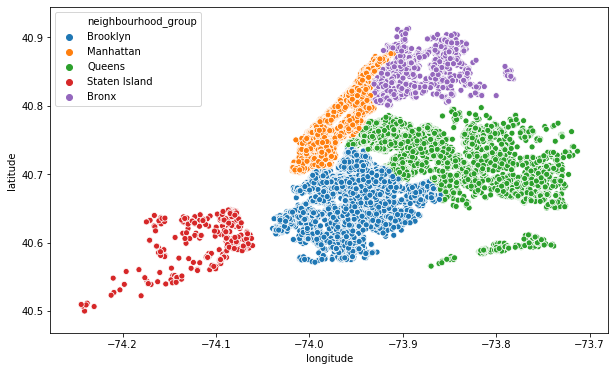

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data.longitude, data.latitude, hue=data.neighbourhood_group)
plt.ioff()

ابتدا داده ها رو براساس موقعیت جغرافیایشون رسم کردیم که تقریبا شبیه نقشه شهر نیورک هم میشه و منطقیه ولی چیزی که از نموار پیداست اینه که تعداد داده هایمون  یعنی تعداد میزبان ها در رنگ در آبی و سبز بیشتر عه یعنی در شهر 
Brooklyn
و شهر
Queens
بیشتر است ولی این لزوما نمیتونه درست باشه شاید در محله دیگه تعداد اون نسبت به این دو محله بیشتر باشن ولی متراکم تر باشن به خاطر به خاط همین در نمودار ۱ متوجه میشمی که آیا حدسمون درست بوده یا نه 


اولین ایده ای به بذهن ی فردی که از ایران این دیتاهارو میبینه اینه که ایا جنسیت میزبان روی قیمت یا مینیمم شب رزرو تاثیر داره یا نه :) 
بخاطر همین تصمیم گرفتیم که از ی مدل استفاده کنیم که از روی اسم میزبان هامون جنسیت اونارو حدس بزنیم وقتی ک فیچر جنسیت رو اضافه کردیم به کارمون چندتا نمودار کشیدیم بنظر ی سری رابطه پیدا کردیم و بعد از اینکه ی ازمون فرض تی تست زدیم و نتیجه گیری کردیم 


## let's check if gender of owner has any impact of price and number of listing and number of review

In [32]:
host_gender = data[['host_id','host_name','price','minimum_nights','number_of_reviews','calculated_host_listings_count']]
host_gender= host_gender[pd.notnull(host_gender['host_name'])]
host_gender.head()

host_id    host_name  price  minimum_nights  number_of_reviews  \
0     2787         John    149               1                  9   
1     2845     Jennifer    225               1                 45   
2     4632    Elisabeth    150               3                  0   
3     4869  LisaRoxanne     89               1                270   
4     7192        Laura     80              10                  9   

   calculated_host_listings_count  
0                               6  
1                               2  
2                               1  
3                               1  
4                               1

In [33]:
import  gender_guesser.detector as gender
d = gender.Detector()

In [34]:
host_gender['gender']=host_gender['host_name'].apply(lambda x : d.get_gender(x))
host_gender.head()

host_id    host_name  price  minimum_nights  number_of_reviews  \
0     2787         John    149               1                  9   
1     2845     Jennifer    225               1                 45   
2     4632    Elisabeth    150               3                  0   
3     4869  LisaRoxanne     89               1                270   
4     7192        Laura     80              10                  9   

   calculated_host_listings_count   gender  
0                               6     male  
1                               2   female  
2                               1   female  
3                               1  unknown  
4                               1   female

In [35]:
host_gender.groupby('gender').count()

host_id  host_name  price  minimum_nights  number_of_reviews  \
gender                                                                        
andy               779        779    779             779                779   
female           17707      17707  17707           17707              17707   
male             16795      16795  16795           16795              16795   
mostly_female     1501       1501   1501            1501               1501   
mostly_male       1380       1380   1380            1380               1380   
unknown          10712      10712  10712           10712              10712   

               calculated_host_listings_count  
gender                                         
andy                                      779  
female                                  17707  
male                                    16795  
mostly_female                            1501  
mostly_male                              1380  
unknown                                 10712

In [36]:
display(host_gender.loc[host_gender['gender'] == 'andy'].head())
display(host_gender.loc[host_gender['gender'] == 'unknown'].head())

host_id host_name  price  minimum_nights  number_of_reviews  \
69      4396     Casey     99               1                106   
125  6197784        Jo     90               1                  9   
146   143027      Ming    195               4                240   
161   110506     Myung     79              30                 28   
361   526805        Mi    130               7                 98   

     calculated_host_listings_count gender  
69                                2   andy  
125                               1   andy  
146                               1   andy  
161                               1   andy  
361                               1   andy

host_id      host_name  price  minimum_nights  number_of_reviews  \
3      4869    LisaRoxanne     89               1                270   
6      7356          Garon     60              45                 49   
8      7490      MaryEllen     79               2                118   
15    15991  Allen & Irina    140               2                148   
17    18946           Doti    140               1                260   

    calculated_host_listings_count   gender  
3                                1  unknown  
6                                1  unknown  
8                                1  unknown  
15                               1  unknown  
17                               1  unknown

so we drop all unknown and andy records

In [37]:
host_gender=host_gender.drop(host_gender[host_gender.gender=='andy'].index)
host_gender=host_gender.drop(host_gender[host_gender.gender=='unknown'].index)
host_gender.loc[host_gender['gender'] == 'mostly_female', ['gender']] = 'female'
host_gender.loc[host_gender['gender'] == 'mostly_male', ['gender']] = 'male'
host_gender.loc[host_gender['gender'] == 'male', ['gender']] = 1
host_gender.loc[host_gender['gender'] == 'female', ['gender']] = 0
host_gender=host_gender.drop(['host_name'],axis=1)

In [38]:
corr = host_gender.corr()
corr.style.background_gradient(cmap='coolwarm')

دیتا هامون کورلیشن خاصی با فیچر هامون ندارن ولی چون دیتای جنسیت باینری هست منطقیه که خیلی رابطه ای ب چشم نیاد مخصوصا چون ما رکورد هایی که جنسیتشون مجهول بود رو از دیتامون حذف کردیم ولی نکته ای که وجود داره اینه که وقتی تحلیلای توزیع هارو تست کردیم نتایج خوبی گرفتیم

In [39]:
print('---Male')
display(host_gender[host_gender.gender==1].describe())
print('---Female')
display(host_gender[host_gender.gender==0].describe())

---Male


host_id         price  minimum_nights  number_of_reviews  \
count  1.817500e+04  18175.000000    18175.000000       18175.000000   
mean   6.540860e+07    154.427785        6.847153          23.062338   
std    7.772192e+07    221.460250       18.239724          43.871153   
min    2.787000e+03      0.000000        1.000000           0.000000   
25%    7.776920e+06     70.000000        1.000000           1.000000   
50%    2.864016e+07    110.000000        3.000000           5.000000   
75%    1.033570e+08    180.000000        5.000000          23.000000   
max    2.743115e+08   9999.000000     1000.000000         488.000000   

       calculated_host_listings_count   gender  
count                    18175.000000  18175.0  
mean                         3.597304      1.0  
std                         11.131362      0.0  
min                          1.000000      1.0  
25%                          1.000000      1.0  
50%                          1.000000      1.0  
75%                          2.000000      1.0  
max                        103.000000      1.0

---Female


host_id         price  minimum_nights  number_of_reviews  \
count  1.920800e+04  19208.000000    19208.000000       19208.000000   
mean   6.010510e+07    149.872865        6.861047          22.140775   
std    7.355637e+07    266.516898       23.298156          43.288731   
min    2.845000e+03      0.000000        1.000000           0.000000   
25%    6.802500e+06     69.000000        1.000000           1.000000   
50%    2.636173e+07    105.000000        3.000000           5.000000   
75%    8.707375e+07    170.000000        5.000000          22.000000   
max    2.743213e+08  10000.000000     1250.000000         629.000000   

       calculated_host_listings_count   gender  
count                    19208.000000  19208.0  
mean                         2.968034      0.0  
std                         10.553940      0.0  
min                          1.000000      0.0  
25%                          1.000000      0.0  
50%                          1.000000      0.0  
75%                          2.000000      0.0  
max                        121.000000      0.0

Ttest_indResult(statistic=1.7918969601450074, pvalue=0.07315755802542322)


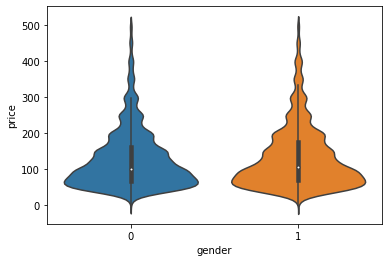

In [40]:
print(scipy.stats.ttest_ind(host_gender[host_gender.gender==1].price, host_gender[host_gender.gender==0].price))
ax = sns.violinplot(x="gender", y="price",data=host_gender[host_gender.price < 500],scale="width")

there is a little information in this male host have more price on 75% of distribution

Ttest_indResult(statistic=2.043856646336926, pvalue=0.04097470461432081)


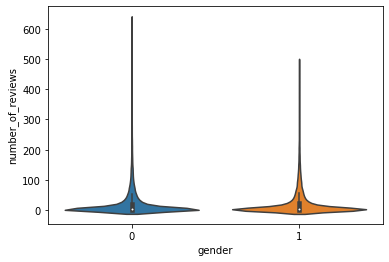

In [41]:
print(scipy.stats.ttest_ind(host_gender[host_gender.gender==1].number_of_reviews, host_gender[host_gender.gender==0].number_of_reviews))
ax = sns.violinplot(x="gender", y="number_of_reviews",data=host_gender,scale="width")

Ttest_indResult(statistic=5.610587116141991, pvalue=2.030656769150408e-08)


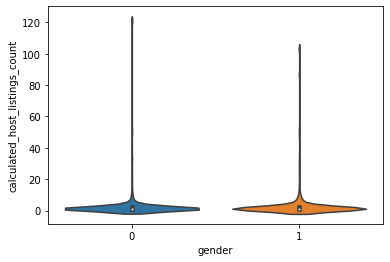

In [42]:
print(scipy.stats.ttest_ind(host_gender[host_gender.gender==1].calculated_host_listings_count, host_gender[host_gender.gender==0].calculated_host_listings_count))
ax = sns.violinplot(x="gender", y="calculated_host_listings_count",data=host_gender,scale="width")

Ttest_indResult(statistic=-0.06396568177457355, pvalue=0.9489978948270685)


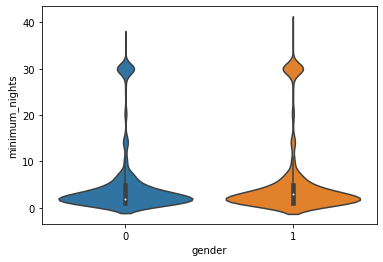

In [43]:
print(scipy.stats.ttest_ind(host_gender[host_gender.gender==1].minimum_nights, host_gender[host_gender.gender==0].minimum_nights))
ax = sns.violinplot(x="gender", y="minimum_nights",data=host_gender[host_gender.minimum_nights<40],scale="width")

Ttest_indResult(statistic=2.043856646336926, pvalue=0.04097470461432081)


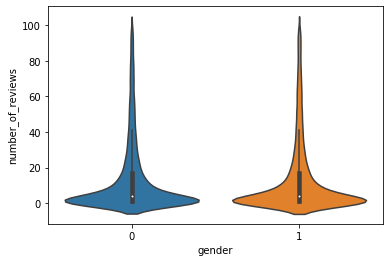

In [44]:
print(scipy.stats.ttest_ind(host_gender[host_gender.gender==1].number_of_reviews, host_gender[host_gender.gender==0].number_of_reviews))
ax = sns.violinplot(x="gender", y="number_of_reviews", data=host_gender[host_gender.number_of_reviews < 100], scale="width")

Ttest_indResult(statistic=-0.06396568177457355, pvalue=0.9489978948270685)


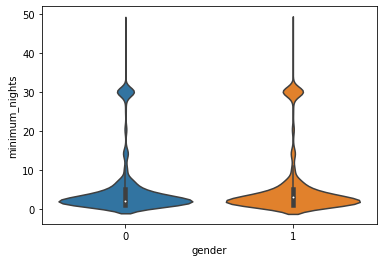

In [45]:
print(scipy.stats.ttest_ind(host_gender[host_gender.gender==1].minimum_nights, host_gender[host_gender.gender==0].minimum_nights))
ax = sns.violinplot(x="gender", y="minimum_nights", data=host_gender[host_gender.minimum_nights < 50], scale="width")

Ttest_indResult(statistic=5.610587116141991, pvalue=2.030656769150408e-08)


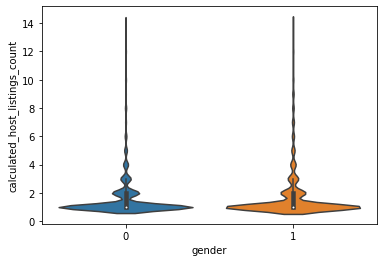

In [46]:
print(scipy.stats.ttest_ind(host_gender[host_gender.gender==1].calculated_host_listings_count, host_gender[host_gender.gender==0].calculated_host_listings_count))
ax = sns.violinplot(x="gender", y="calculated_host_listings_count",data=host_gender[host_gender.calculated_host_listings_count < 15], scale="width")

دیتای اولیه شرکت ایر بی اند بی شامل دیتای افرادی در محله های مختلف نیویورک است که خانه های خود را به افراد بومی نیویورک یا مسافران یا توریست ها یا افرادی ه برای کار به نیویرک میایند و کاری بازه ای انجام میدهند و برای اقامت خانه این افراد را اجاره میکنند 
ابتدا مقداری تحلیل های معمولی و بیسیک رو بررسی میکنیم سپس بدنبال ارتباط های پنهان م مخفی توی دیتا ها و روابط مختلف اون ها میپردازیم و نتایجی که تونستیم از دیتا ها بگیریم رو نشون میدیم 

نوع های مختلف دیتاهایی که توی دیتا سیت داریم به شرح زیر هست و به ترتیب بر اساس هرنوعی که این دیتا ها دارن توی مراحل بعدی و مراحل ویژوال کردن باهاشون برخورد میکنیم

در مرحله اول که شروع به بررسی مقادیر فیچر ها کردیم متوجه چند اسم میزبان نا مشخص شدیم سعی 
ایده این بود که شاید یک هاست توی یک رکورد اسمش ثبت نشده باشه و بتونیم از سطر های دیگمون این مقادیر رو پر کنیم ولی وقتی چکش کردیم متوجه شدیم که اینطوری نیست 
و ساختار دیتا بیسشون احتمال زیاد رابطه ای هست و اگر مقداری نال ثبت شده باشه کلا توی هیچ تیبلی نمیشه داشتش و حدس میزنیم که این افراد یا یک شرکت کوچک هستند . در کار اجاره خانه بوده اند قبل از شروع ایر بی اند بی هستند و اسم نداشتن و موقعی که به سیستم اضافه شدن اسمی ثبت نکردن 
یا شاید از اولین هاست ها بودن و سیستم ولیدیشن دیتا نداشتن اون موقع 

نکته دیگه ای ک متوجه شدیم وجود یه حجم خوبی نال توی فیچر تعداد ریویو در ماه و اخرین ریویو شدیم 
و بدون اینکه از ارتباط این رکورد ها با خبربشیم تصمیم گرفتیم که این فیچر هارو دراپ کنیم 
البته چون در اینده هم ایده ای روی این ۲ تا فیچر نزدیم سعی نکردیم مقادری رو پیش بینی کنیم و به دراپ کردن فیچر ها بسنده کردیم 


اولین ایده ای به بذهن ی فردی که از ایران این دیتاهارو میبینه اینه که ایا جنسیت میزبان روی قیمت یا مینیمم شب رزرو تاثیر داره یا نه :) 
بخاطر همین تصمیم گرفتیم که از ی مدل استفاده کنیم که از روی اسم میزبان هامون جنسیت اونارو حدس بزنیم وقتی ک فیچر جنسیت رو اضافه کردیم به کارمون چندتا نمودار کشیدیم بنظر ی سری رابطه پیدا کردیم و بعد از اینکه ی ازمون فرض تی تست زدیم و نتیجه گیری کردیم 

دیتا هامون کورلیشن خاصی با فیچر هامون ندارن ولی چون دیتای جنسیت باینری هست منطقیه که خیلی رابطه ای ب چشم نیاد مخصوصا چون ما رکورد هایی که جنسیتشون مجهول بود رو از دیتامون حذف کردیم ولی نکته ای که وجود داره اینه که وقتی تحلیلای توزیع هارو تست کردیم نتایج خوبی گرفتیم


قسمت اول رابطه جنسیت و قیمت خونه هارو بررسی کردیم طبق شهود نموداری بنظر یکسان میان ولی طبق نتیجه تی تست یعنی یا سمپلینگ ما اشتباه هست یا هر دو جامعه در میانگین با هم اختلاف دارند و با فرض گرفتن درست بودن سمپلینگ نتیجه میگیریم که مانگین ها اشتباه هستند پس جنسیت زدگی توی نیویورک وجود داره و قیمت یه خونه بخاطر جنسیت دارنده اون زیاد میشه
قسمت دوم دنبال این بودیم که نکنه مردم به میزبان های خانوم ریویو بیشتری میدن یا نه؟
با توجه به حرفایی که توی قسمت قبل زدیم نتیجه این شد که بله جنسیت روی تعداد ریویو تاثیر داره ولی جالب تر اینه که اقایون ریویو بیشتری میگیرن مه خانوم ها 
در قسمت سوم تاثیر جنسیت رو روی ملاک شمارش لیست میزبان بررسی کردیم
و مشابه قبل متوجه ارتباط جنسیت شدیم
در قسمت سوم بررسی کردیم که ایا مینیمم شب رزرو روی جنسیت تاثیر داشته یا ن و طبق نتیجه تی تست متوجه شدیم که خیر جنسیت روی مینیمم شب رزرو تاثیر نداره 

نتیجه کلی کار این شد که حنسیت تقریبا روی همه جوانب کار تاثیر دار ولی اینطوری نیست که مثلا فقط خانوم ها میانگین بالارو داشته باشن و در بعضی از موارد کلا تاثیری نداشت جنسیت پس میشه گفت جنسیت زدگی خیلی توی نیویورک مطرح نیست



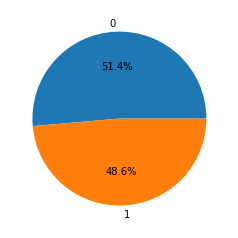

In [20]:
labels = host_gender.gender.value_counts().index
explode = [0,0]
sizes = host_gender.gender.value_counts().values
plt.pie(sizes, explode=explode, labels=labels,autopct='%1.1f%%')
plt.show()

برای اینکه نشون بدیم چقدر از جامعه مرد و چقدر زن هستند از این نمودار استفاده کردیم و متوجه شدیم که تعداد خانومایی که خونشونو اجاره میدن بیشتر هستن 
حالا چرا؟ 
اگر ما در نظر نگیریم که خطای مدلمون برای حدس جنسیت زیاد بوده و بیخیال دیتاهایی که نتونستیم چک کنیم جنسیتشون چیه 
و با در نظر گرفتن اینکه مدل مشابه با مدلی که برای بررسی جنسیت وجود داره برای سن افراد هم وجود داره ولی چون وب اپ بود نتونستیم توی نوت بوک نشون بدیم ولی سن افراد از روی اسمشون تقریبا بالای ۳۰ ۴۰ بود با توجه ای این نکته فک کردیم شاید منطقی باشه اینطوری فکر کنیم که خانوم های بازنشسته که منبع درامدیه دیگه ای ندارن سرویسی که ایر بی اند بی در اختیارشون قرار میده که میتونن خونشون رو اجاره بدن با کمترین دردسر و درصد سایت کم میتونن به طور ماهیانه یه درامد داشته باشن و دیگه مجبور نباشن توی سن های بالا کار خاصی انجام بدن و درامدشون امن بشه


## let's check realation of name and neighbourhood

نکته باحال بعدی که ما دنبالش بودیم این بود ایا توی نیویورک منطقه ای کهخ هاست توی الون حضور داره رو نوع حرف زدنش توی متن اگهی اون تاثیری میذاره یعنی مثلا هر کدوم از منطقه های نیویرک با ی نوع حرف زدن خاص توی اگهی هاشون حرف بزنن و با لحن خاصی متن بنویسن 
به زبان دیگه مثلا بافت فرهنگی گفتاری متفاوتی توی ۵ منطقه اصلیه نیویورک با مناطق کوچیک تر اون وجود داره یا ن 

بخاطر اینکه ببینیم ایا همچین رابطه ای وجود داره متن اگهی های رو کلاستر کردیم و رند ایندکس لیبل هایکلاستر هارو با اسم مناطق بررسی کردیم 


In [21]:
print (data['neighbourhood'].nunique(),len(data))
print (data['neighbourhood_group'].nunique(),len(data))

221 48895
5 48895


In [22]:
name_neighbourhood=data[['name','neighbourhood','neighbourhood_group','price']]
name_neighbourhood.head()

name neighbourhood  \
0                Clean & quiet apt home by the park    Kensington   
1                             Skylit Midtown Castle       Midtown   
2               THE VILLAGE OF HARLEM....NEW YORK !        Harlem   
3                   Cozy Entire Floor of Brownstone  Clinton Hill   
4  Entire Apt: Spacious Studio/Loft by central park   East Harlem   

  neighbourhood_group  price  
0            Brooklyn    149  
1           Manhattan    225  
2           Manhattan    150  
3            Brooklyn     89  
4           Manhattan     80

In [23]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics.cluster import adjusted_rand_score

In [24]:
tfidf = TfidfVectorizer(min_df = 500, max_df = 0.95, max_features = 8000, stop_words = 'english')
tfidf.fit(name_neighbourhood['name'].values.astype(str))
text = tfidf.transform(name_neighbourhood['name'].values.astype(str))

In [25]:
clusters = MiniBatchKMeans(n_clusters=5, init_size=1024, batch_size=2048, random_state=20).fit_predict(text)

In [26]:
adjusted_rand_score(clusters,name_neighbourhood.neighbourhood_group)

0.0036952482090660834

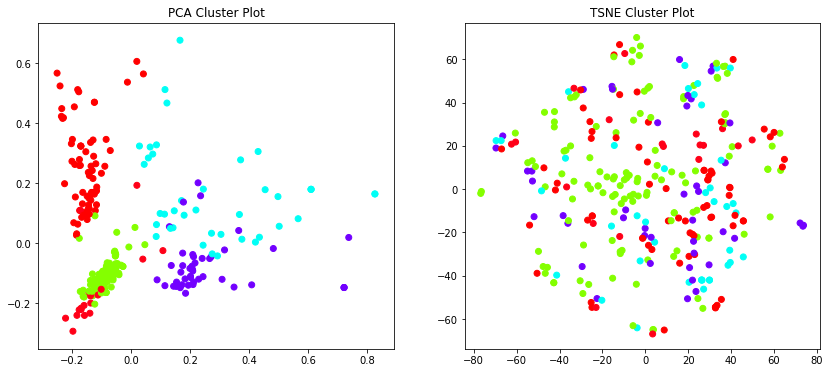

In [27]:
def plot_tsne_pca(data, labels):
    max_label = max(labels)
    max_items = np.random.choice(range(data.shape[0]), size=3000, replace=False)
    
    pca = PCA(n_components=2).fit_transform(data[max_items,:].todense())
    tsne = TSNE().fit_transform(PCA(n_components=50).fit_transform(data[max_items,:].todense()))
    
    
    idx = np.random.choice(range(pca.shape[0]), size=300, replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
    f, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    ax[0].set_title('PCA Cluster Plot')
    
    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax[1].set_title('TSNE Cluster Plot')
    
plot_tsne_pca(text, clusters)

In [28]:
def get_top_keywords(data, clusters, labels, n_terms):
    df = pd.DataFrame(data.todense()).groupby(clusters).mean()
    
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([labels[t] for t in np.argsort(r)[-n_terms:]]))
            
get_top_keywords(text, clusters, tfidf.get_feature_names(), 10)


Cluster 0
apt,williamsburg,east,beautiful,sunny,brooklyn,spacious,cozy,apartment,bedroom

Cluster 1
nyc,williamsburg,cozy,park,manhattan,loft,1br,home,brooklyn,apt

Cluster 2
apt,williamsburg,brooklyn,manhattan,bath,bathroom,cozy,bedroom,room,private

Cluster 3
beautiful,near,large,williamsburg,brooklyn,manhattan,sunny,spacious,cozy,room

Cluster 4
west,private,manhattan,spacious,park,village,apartment,east,cozy,studio


.

برای این کا  اول اومدیم یه ورد تو وک روی متن اگهی ها زدیم و اونارو به ۵ کلاستر تبدیل کردیم و همونطور که از نمودار و نتایج کلمات توی هر کلاستر میبینیم متوجه میشیم که خیلی ارتباطی روی متن اگهی ها وجود نداره و دقت رند ایندکس هم بسیار کمتر هست پس کلا نمیتونیم نتیجه بگیریم که حداق توی ۵ منطقه اصلیه نیویورک تفاوت فرهنگی گفتاری ای بین افراد وجود داره

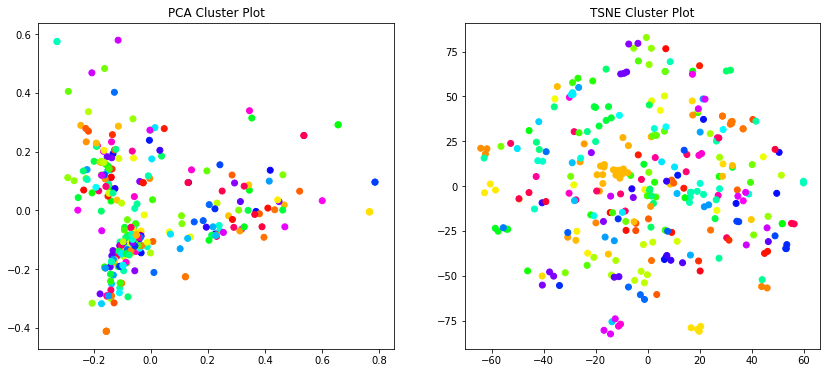

In [29]:
clusters = MiniBatchKMeans(n_clusters=221, init_size=1024, batch_size=2048, random_state=20).fit_predict(text)
plot_tsne_pca(text, clusters)

In [30]:
adjusted_rand_score(clusters,name_neighbourhood.neighbourhood)

0.06691539622141146

همنین کار هارو برای ۲۲۱ منطقه کوچیک تر نیویورک انجام دادیم وباز هم نتیجه مشابه قبل شد 
ونتونستیم نتیجه ای بگیریم از متن اگهی ها 

نکته باحال تر این هست که یک سری از کلمات توی کلاستر های مختلفمون پر تکرار بودن که همین کمک میکنه که نتیجه بگیریم تفاوت فرهنگی گفتاری خاصی وجود نداره و در یک قالب متن اگهی ها نوشته میشه 
اگر بخاطر قوانین محدود کننده برای متن اگهی ها نباشه و مردم وقتی به تازگی عضو سایت میشن سعی میکنن مشابه بقیه اگهی های موجود توی سایت متن بزنن 
پس اینطوری اون نوع اگهی های یوزر های اولیه تعمیم پیدا میکنه به نوع حرف زدن یوزر های جدیدمون توی بازه زمان و باعث یکسانی فرهنگ و نوع گفتار افراد مناطق مختلف در نیویورک 
اگر وارد بالا نباشن که خیلی محتمل هستن میشه نتیجه گرفت یک فرهنگ قالب گفتاری نوشتاری توی کل مناطق نیویورک برقراره 
و نتیجه گیری بهتری با این دیتاها نمیشه گرفت


clusters on neighbours is more accurate than neighbour_group but result are not good enough to be consider

## let's do some on the book eda

In [4]:
classic = data[['neighbourhood_group','neighbourhood','latitude','longitude','room_type','price','minimum_nights','number_of_reviews','availability_365']]

In [5]:
classic.head()

neighbourhood_group neighbourhood  latitude  longitude        room_type  \
0            Brooklyn    Kensington  40.64749  -73.97237     Private room   
1           Manhattan       Midtown  40.75362  -73.98377  Entire home/apt   
2           Manhattan        Harlem  40.80902  -73.94190     Private room   
3            Brooklyn  Clinton Hill  40.68514  -73.95976  Entire home/apt   
4           Manhattan   East Harlem  40.79851  -73.94399  Entire home/apt   

   price  minimum_nights  number_of_reviews  availability_365  
0    149               1                  9               365  
1    225               1                 45               355  
2    150               3                  0               365  
3     89               1                270               194  
4     80              10                  9                 0

## price

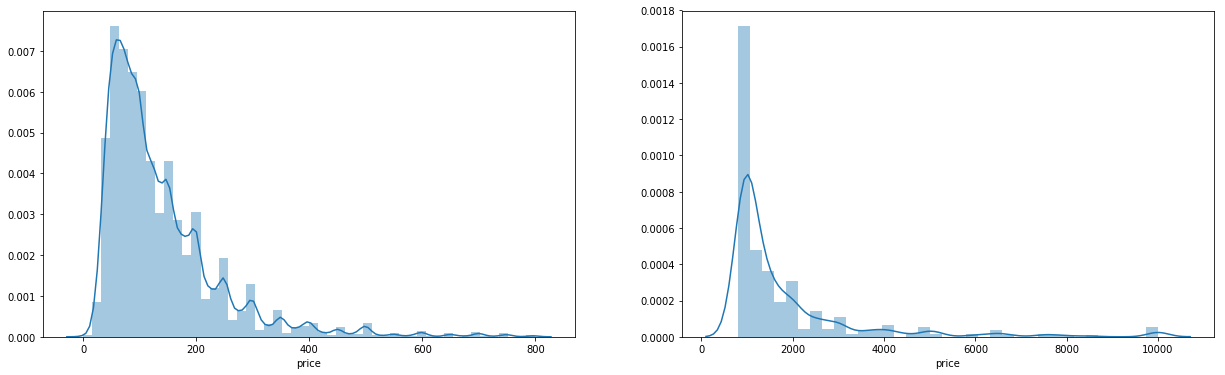

In [21]:
fig, axes = plt.subplots(1,2, figsize=(21,6))
sns.distplot(classic[classic.price<800]['price'], ax=axes[0])
sns.distplot(classic[classic.price>800]['price'], ax=axes[1])

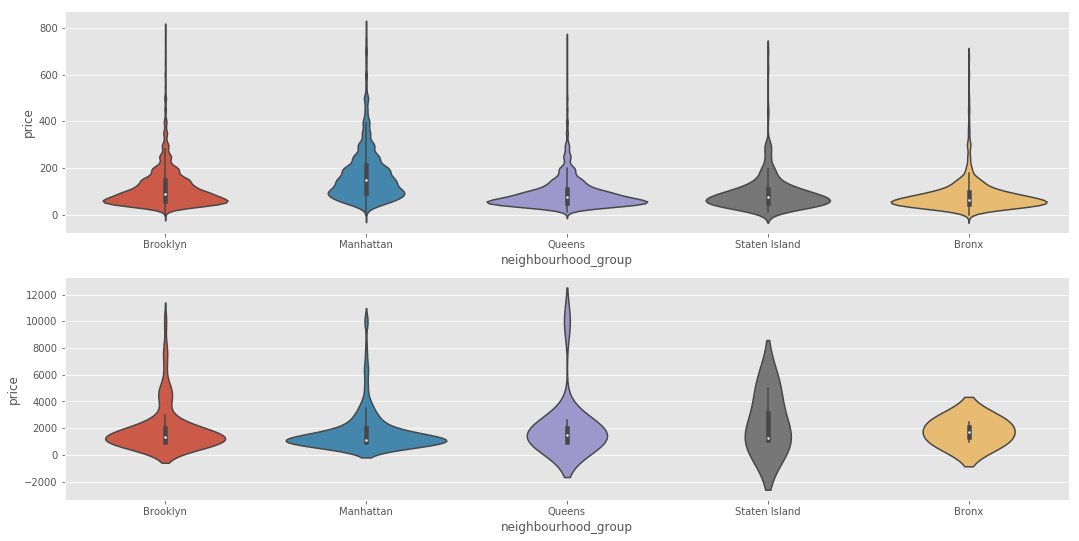

In [48]:
fig, axes = plt.subplots(2,1, figsize=(18,9))
sns.violinplot(classic['neighbourhood_group'], classic[classic.price<800]['price'],ax=axes[0])
sns.violinplot(classic['neighbourhood_group'], classic[classic.price>800]['price'],ax=axes[1])
plt.show()


همین طور که از نمودار ها میشه فهمید نمودار بالا برای خونه های زیر ۸۰۰ دلار هست و نمودار پایینی برای نمودار های بالای ۸۰۰ دلار
و میشه از از توزیع قیمتا نتیجه گرفت که منطقه کویین ارزون تر هست و منهتن گرون ترین منطقه هست ولی نکته باحال اینجاست درسته منهتن توی کل گرون تر هست از بقیه ولی استاتن آیلند خونه های روال و گرون بیشتری داره ولی به طور کلی خیلی منطقه گرونی نیست ولی رویال تره 
بقیه مناطق رابطه نزدیک به همی دارن 


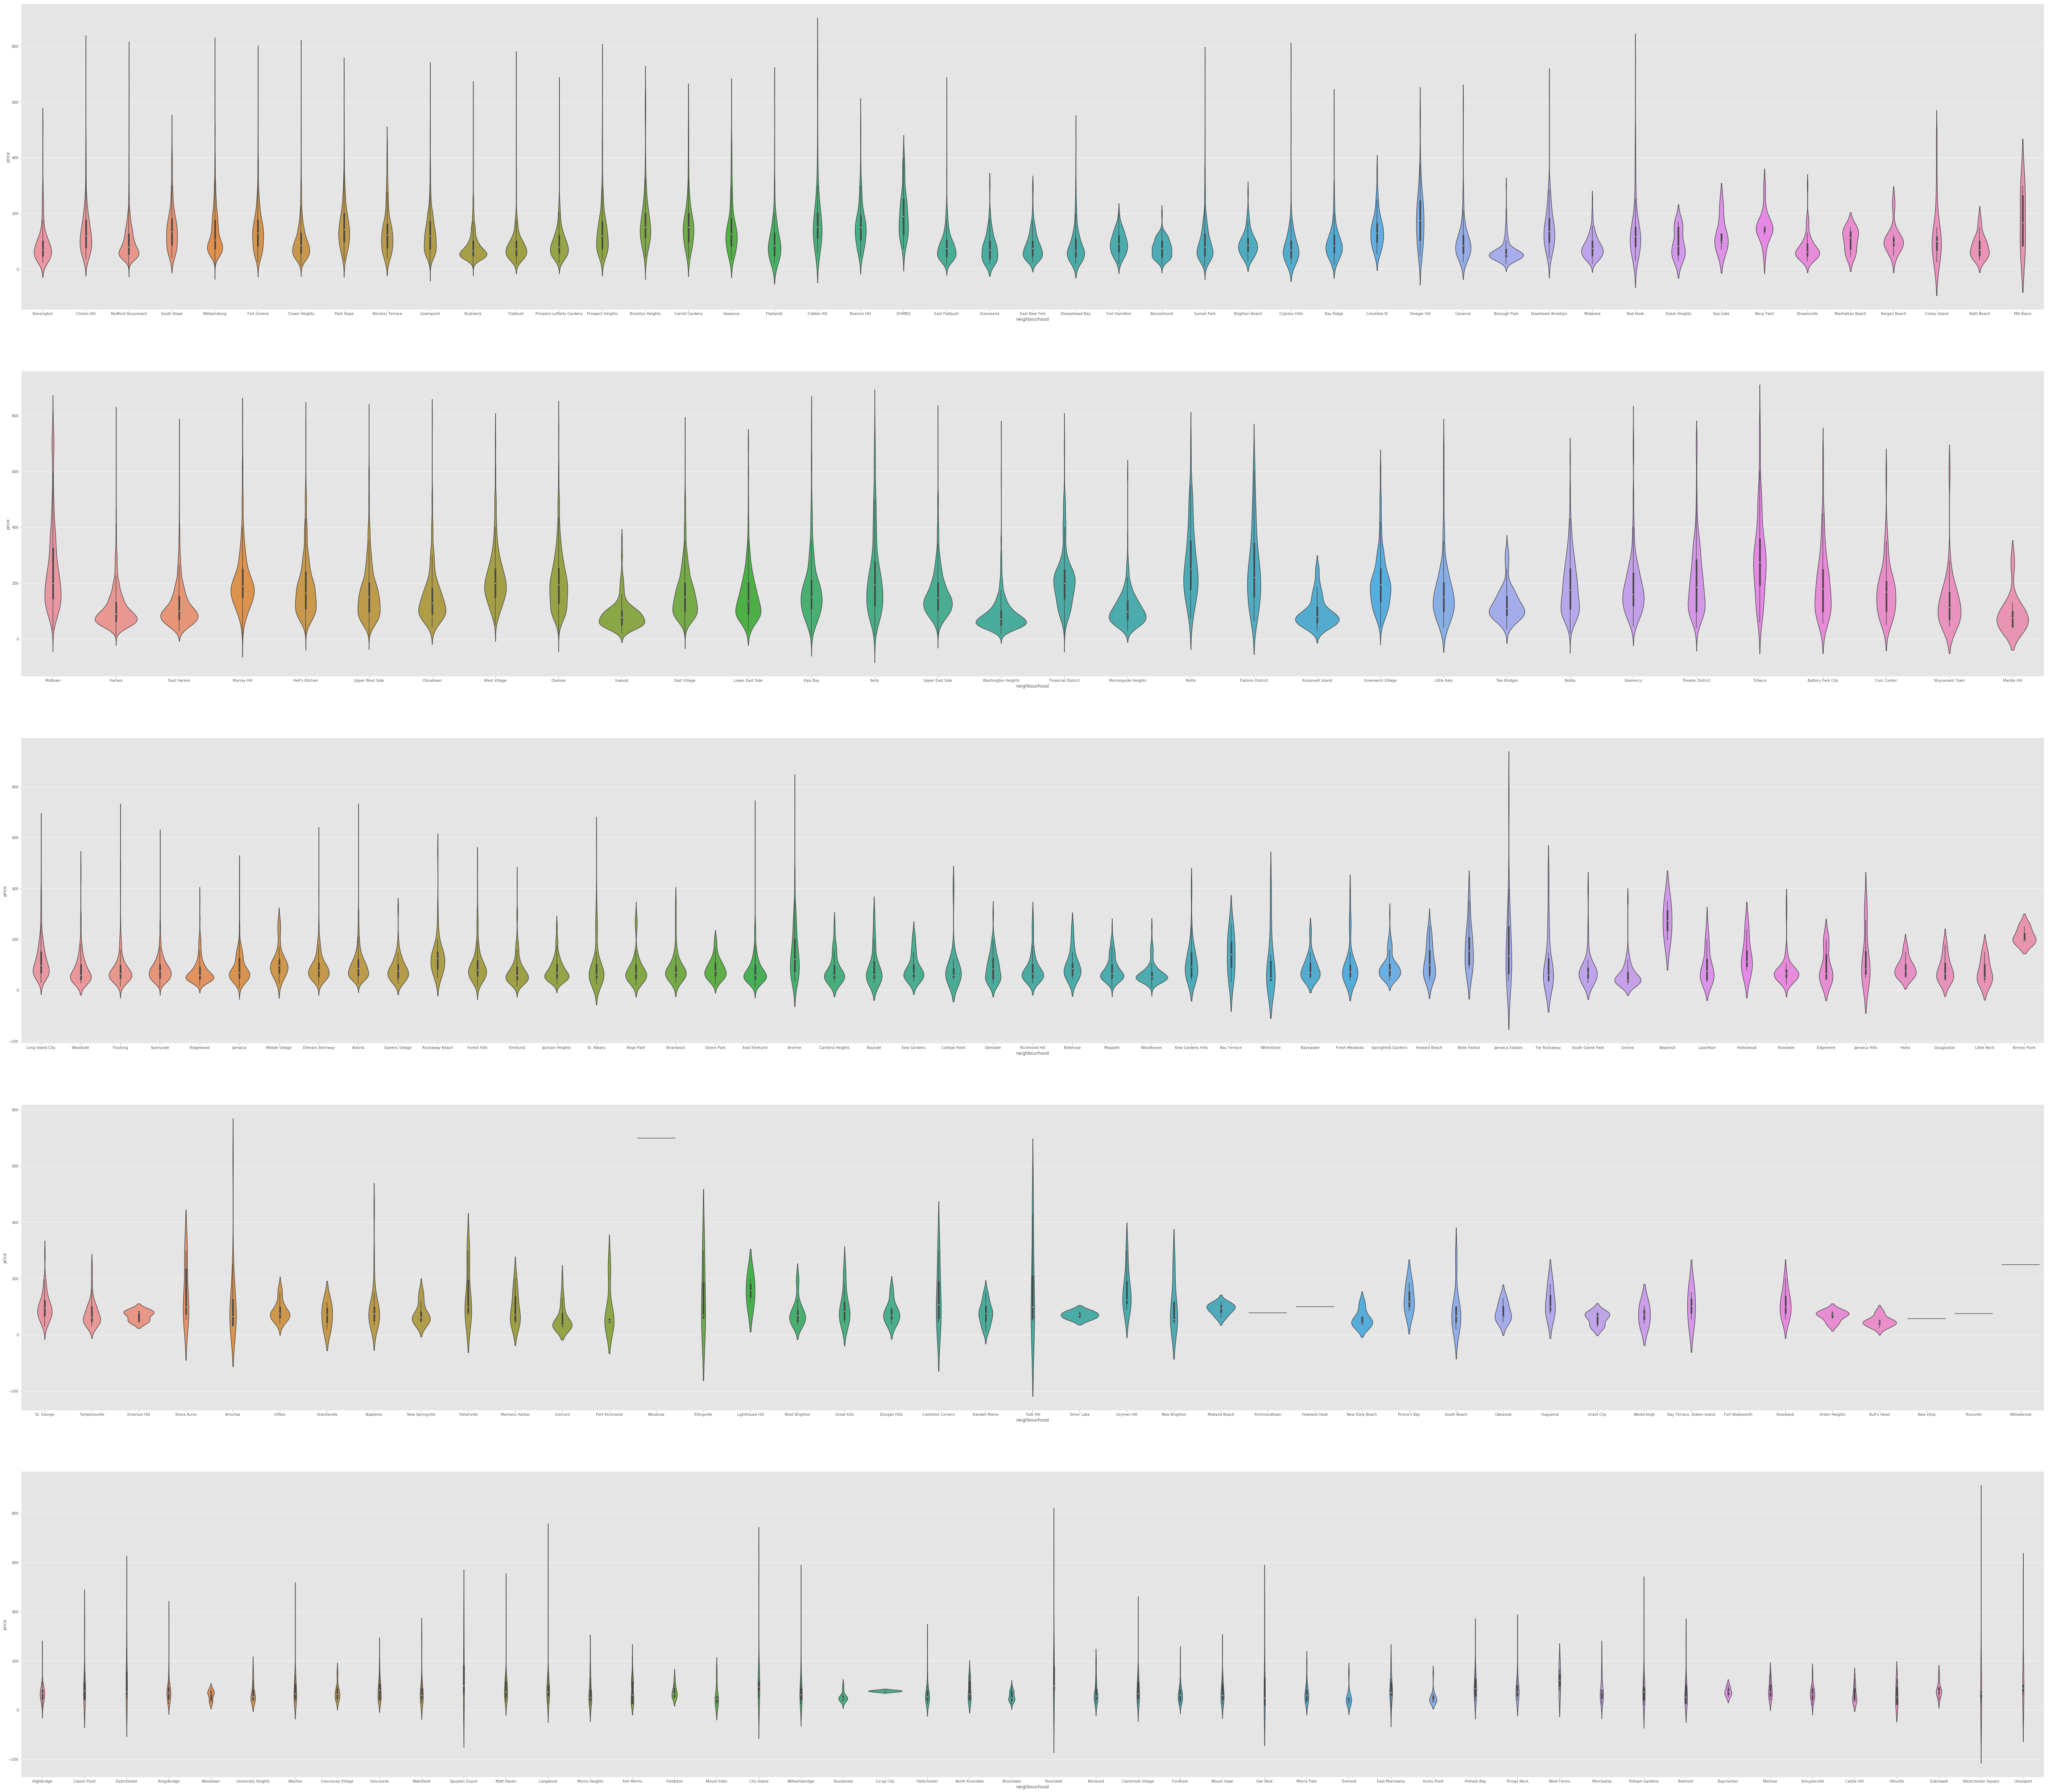

In [55]:
fig, axes = plt.subplots(5,1, figsize=(100,90))
sns.violinplot(classic[classic.neighbourhood_group=='Brooklyn']['neighbourhood'], classic[classic.price<800]['price'],ax=axes[0])
sns.violinplot(classic[classic.neighbourhood_group=='Manhattan']['neighbourhood'], classic[classic.price<800]['price'],ax=axes[1])
sns.violinplot(classic[classic.neighbourhood_group=='Queens']['neighbourhood'], classic[classic.price<800]['price'],ax=axes[2])
sns.violinplot(classic[classic.neighbourhood_group=='Staten Island']['neighbourhood'], classic[classic.price<800]['price'],ax=axes[3])
sns.violinplot(classic[classic.neighbourhood_group=='Bronx']['neighbourhood'], classic[classic.price<800]['price'],ax=axes[4])
plt.show()

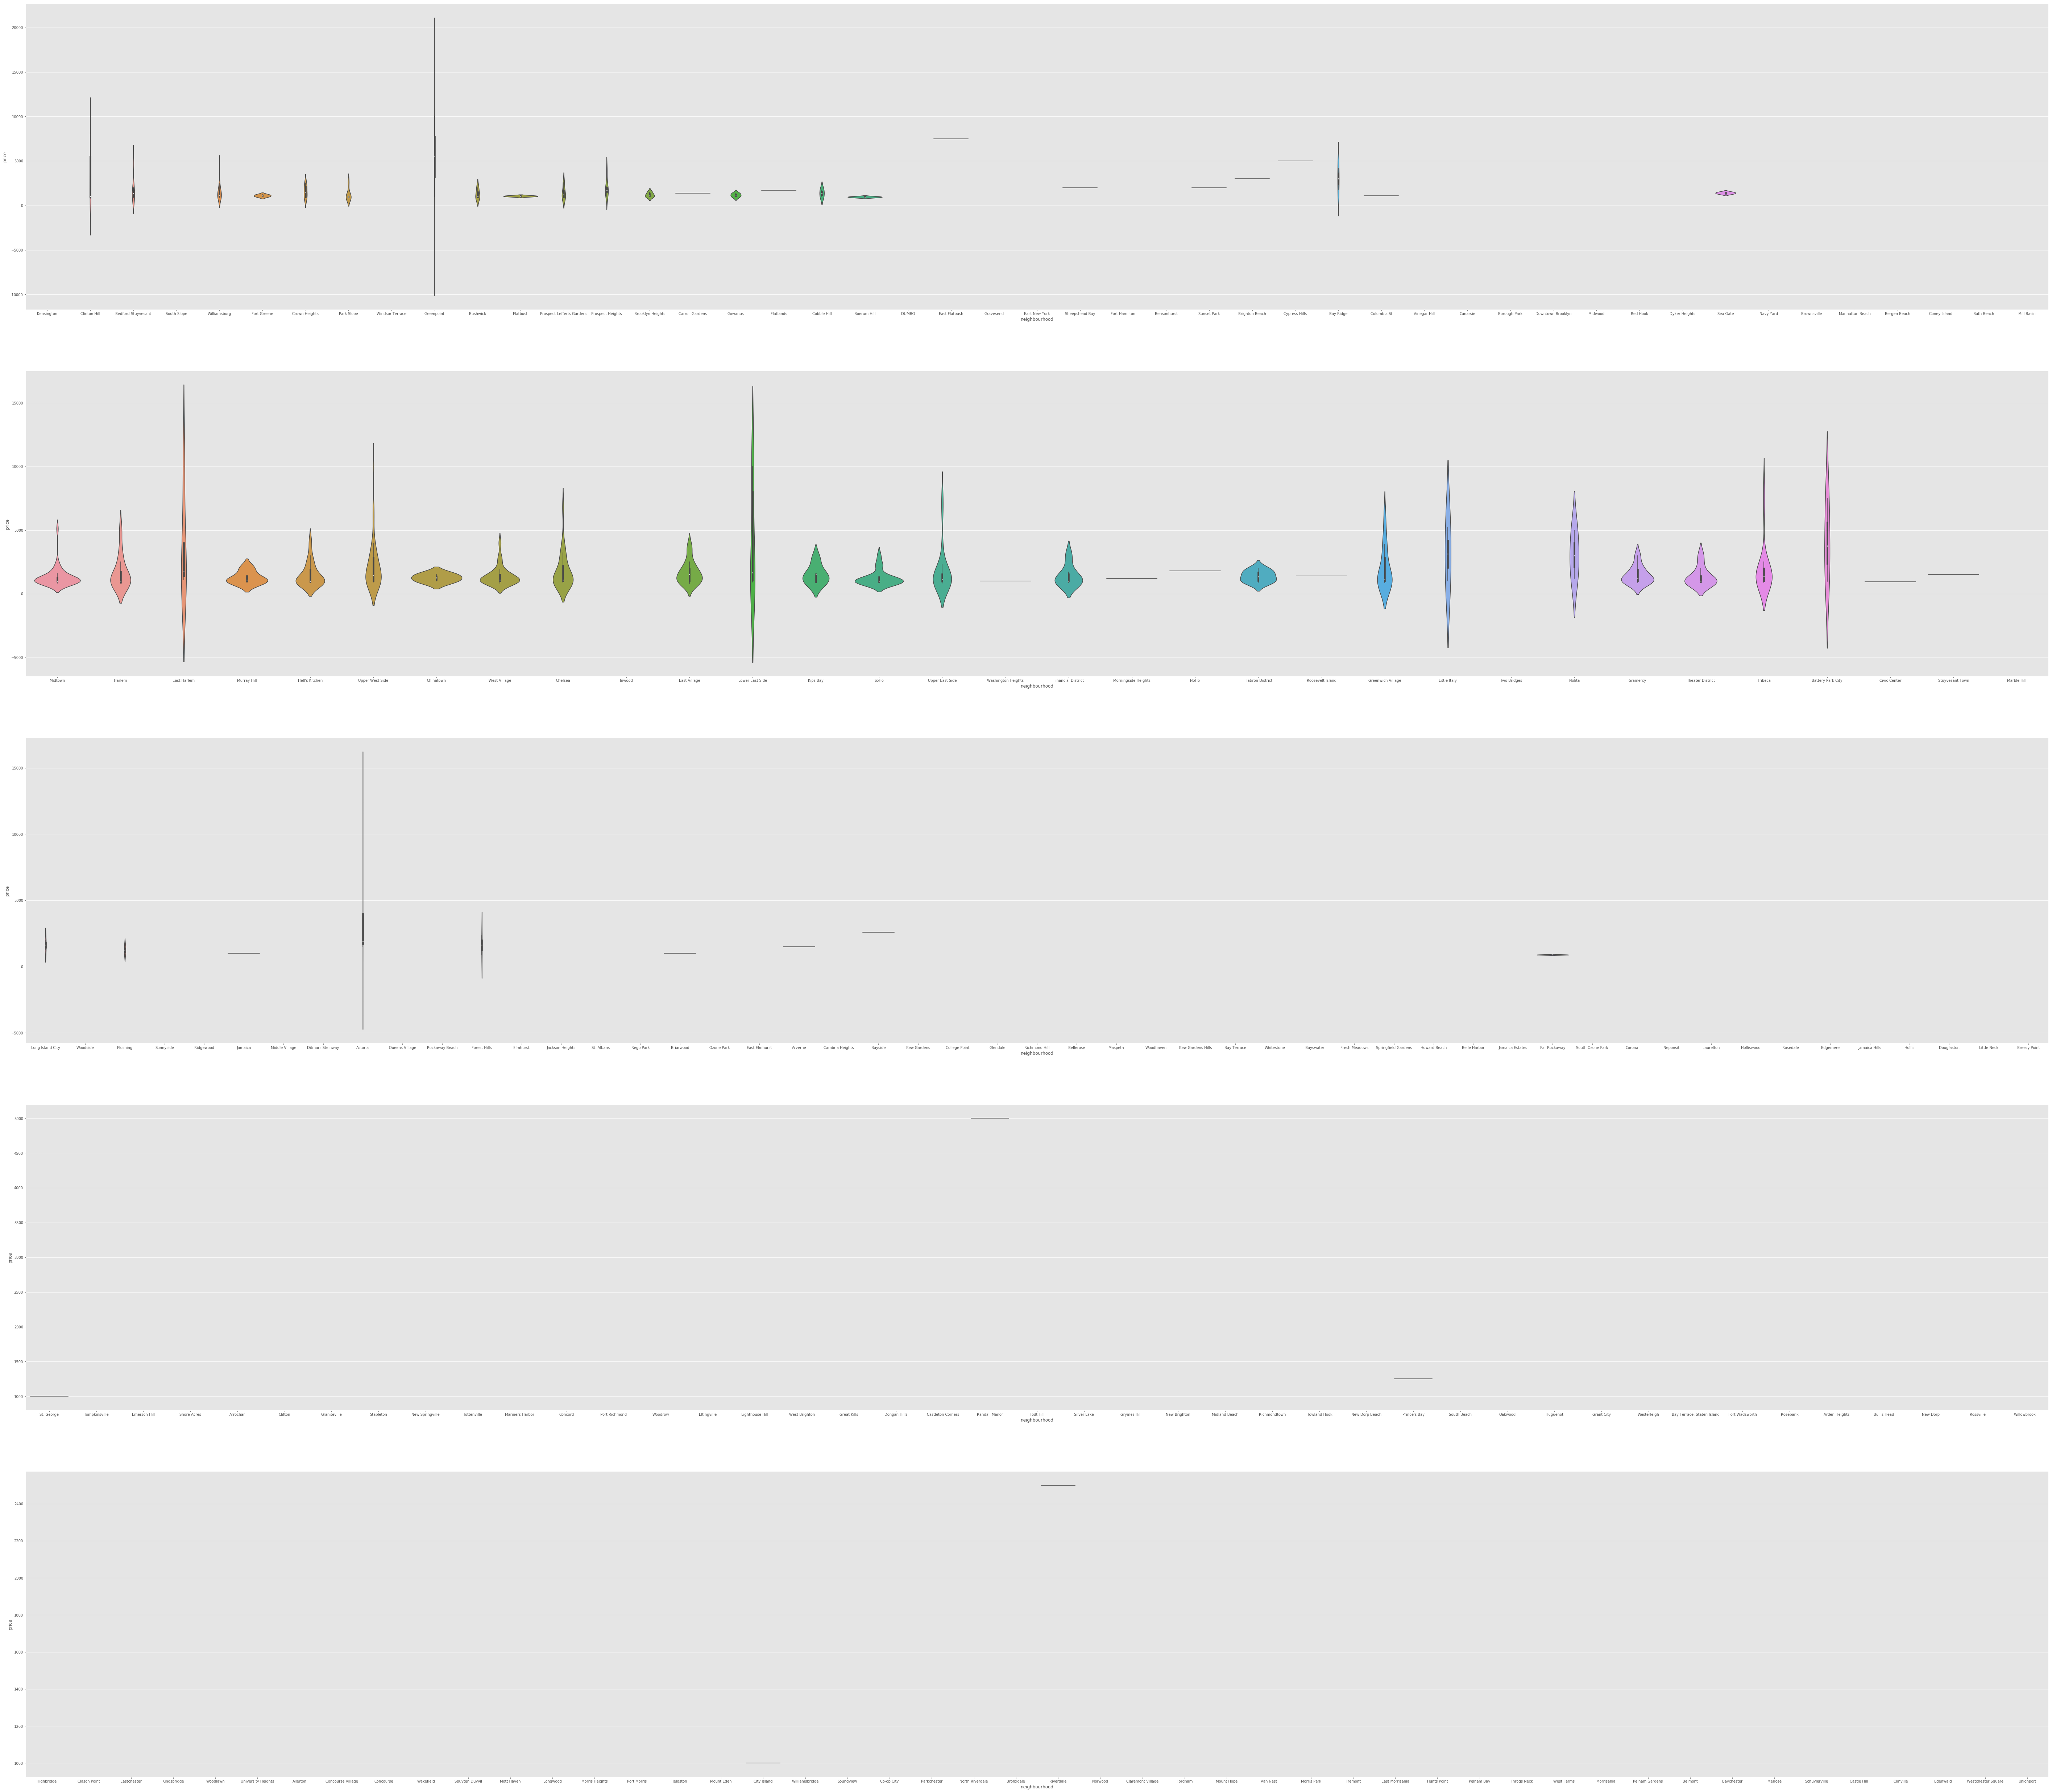

In [56]:
fig, axes = plt.subplots(5,1, figsize=(100,90))
sns.violinplot(classic[classic.neighbourhood_group=='Brooklyn']['neighbourhood'], classic[classic.price>800]['price'],ax=axes[0])
sns.violinplot(classic[classic.neighbourhood_group=='Manhattan']['neighbourhood'], classic[classic.price>800]['price'],ax=axes[1])
sns.violinplot(classic[classic.neighbourhood_group=='Queens']['neighbourhood'], classic[classic.price>800]['price'],ax=axes[2])
sns.violinplot(classic[classic.neighbourhood_group=='Staten Island']['neighbourhood'], classic[classic.price>800]['price'],ax=axes[3])
sns.violinplot(classic[classic.neighbourhood_group=='Bronx']['neighbourhood'], classic[classic.price>800]['price'],ax=axes[4])
plt.show()

همون نمودار بالارو برای هر محله هم انجام دادیم ولی خب این دیتا بدرد ما نمیخوره چون ما شناختی با مناطق کوچیک نیویورک نداریم که بخوایم ازش مفهوم بکشیم بیرون ولی میتونیم این دیتا رو نگه داریم و اگر خواستیم اپلای کنیم و خونه بخریم ازش استفاده کنیم :)))
ولی حالا میتونیم همینطوری تحلیل کلی داشته باشیم ک وقتی منطقه کوچیک میشه نوع بافت اون منطقه یکسان و یکدست تر میشه ینی اگر ما بگیم که یک منطقه فقز نشین هست خیلی فرق داره تا بگیم یک محله فقط نشین هست 
بخاطر همین اگر من بگم چون میانگین قیمت خونه های اجاره ای توی منهتن مثلا از بقیه بالاتره یا بگم یک محله کوچیک توی استاتن ایلند گرون هست جامعیبت کمتری داره 
ینی به زبون دیگه اگر نتیجه گیری برای سطح مادی و فرهنگی بخوایم بگیریم اگر در مورد محله ها صحبت کنیم صحبتمون جامعیت بیشتری خواهد داشت 
پس ینی اگر توی نمودارای بالا بگیم فلام منطقه منطقه فقیر نشینی هست میتونیم نتیجه مون رو جامع بدونیم 
ایده ای که اینجا داشتیم این بود که بیایم محله های فقیر نشین رو با درصد جرم که توی اون محله اتفاق میافته مقایسه کنیم و اثر فقر روی جرم جنایت رو بررسی کنیم 
ولی به دو دلیل این کارو نکردیم 
یک اینکه دیتا رو از کجا بیارریم؟ :)))
دو اینکه اکثر محله هایی ک خونه اجاره میدن مناطق توریستی و کاری هستن و بنظرم میاد که اگر خونه ای توی ی منطقه فقیر نشین باشه اگر برای اجاره قرار داده بشه کسی طرفش نمیره و کم کم توی سایت نمایشش کمتر میشه ( ریویو کمتر میگیره و از این حرفا) پس اگر نتیجه ای از روی این دیتا چون اجاره ای هستن قیمتامون بگیریم اشتباه هست و جامعیت کافی رو نداره


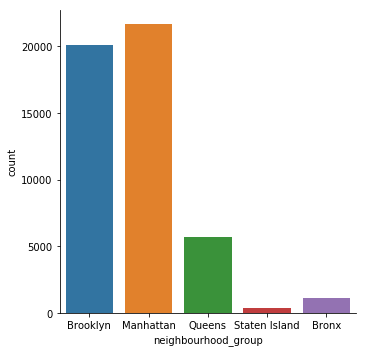

In [25]:
sns.catplot(x='neighbourhood_group', kind='count' ,data=classic)

مرم توی بروکلین و منهتن تعداد بیشتری خونه هاشونو اجاره میدن ولی اگر با اون نموداری که اول کشیدیم مقایسه کنیم متوجه میشیم منهتنبا توجه ب اینکه مساخت کمتری داره و بیشتر ساختمونای اصلی و بزرگ و هولدینگ های شرکت های بیزینسی و کاری اونجاست ملت تعداد خونه بیشتری برای اقامت نیاز دارن بخاطر همین میشه گفت منهتن پر ترافیک ترین منطقه نیویورک میتونه باشه ولی چون بروکلین مساحت نسبتا بیشتری داره نمیتونیم به طور قطع بگیم رنک شماره و از نظر ترافیک بروکلین هست

## room_type

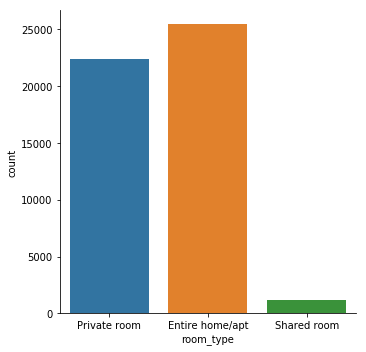

In [26]:
sns.catplot(x='room_type', kind='count' ,data=classic)

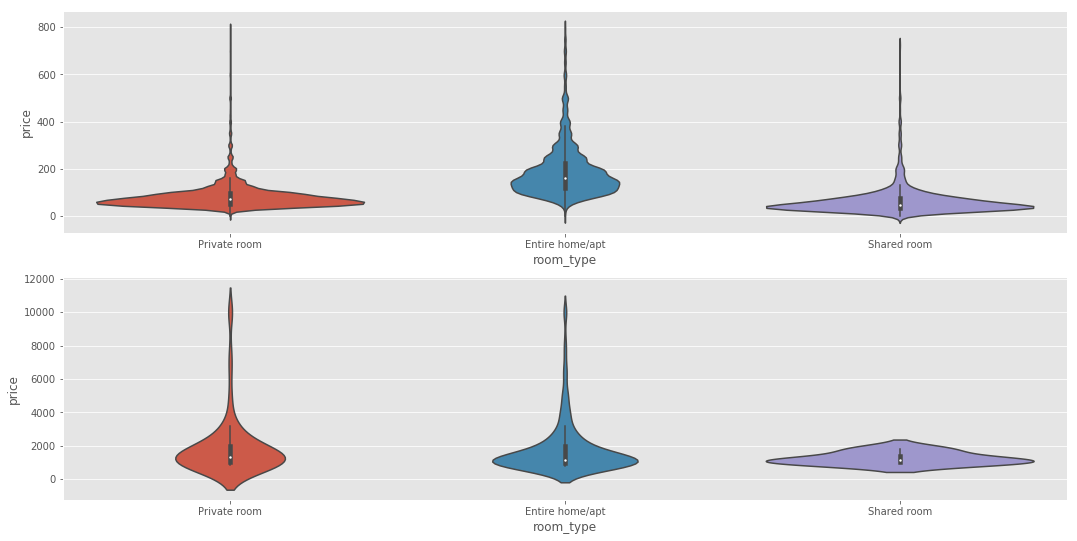

In [72]:
fig, axes = plt.subplots(2,1, figsize=(18,9))
sns.violinplot(classic['room_type'], classic[classic.price<800]['price'],ax=axes[0])
sns.violinplot(classic['room_type'], classic[classic.price>800]['price'],ax=axes[1])
plt.show()

وقتی قیمت رو مورد بررسی قرار دادیم نکته باحالی پیدا کردیم اینکه قیمتا توی بازه زیر ۸۰۰ دلار به طور میانگین توی اجاره کل خونه بالاتر از ۲ نوع دیگه هست 
ولی وقتی وارد بازه لاکچری و بالا ۸۰۰ دلار میشیم میبینیم که قیمت ی اتاق تنها بالا تر قرار میگیره 
حالا چرا ؟
تعداد خونه های پنت هوس طور و گرون قیمت نسبتا کمتر هست ولی یه اتاق لاکچری تر تعدادشون بیشتره 
و بعد از مطالعه میدانی متوجه شدیم بعضی از هتل های کمتر معروف ولی لاکچری طور اتاقاشون روتوی ایر بی اند بی ب فروش میذارن بخاطر همین هست که اتاق های تکی توی قیمت بالا از نظر میانگین بالاتر از اجاره کل خونه لاکچری قرار میگیرن 


E:\ProgramData\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


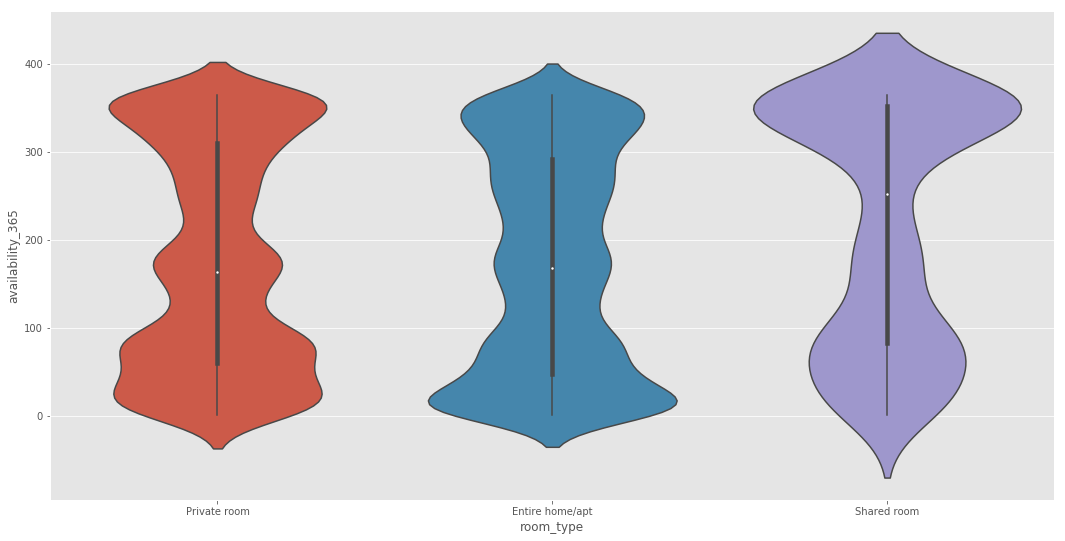

In [74]:
sns.violinplot(classic['room_type'], classic[classic.availability_365>0]['availability_365'])

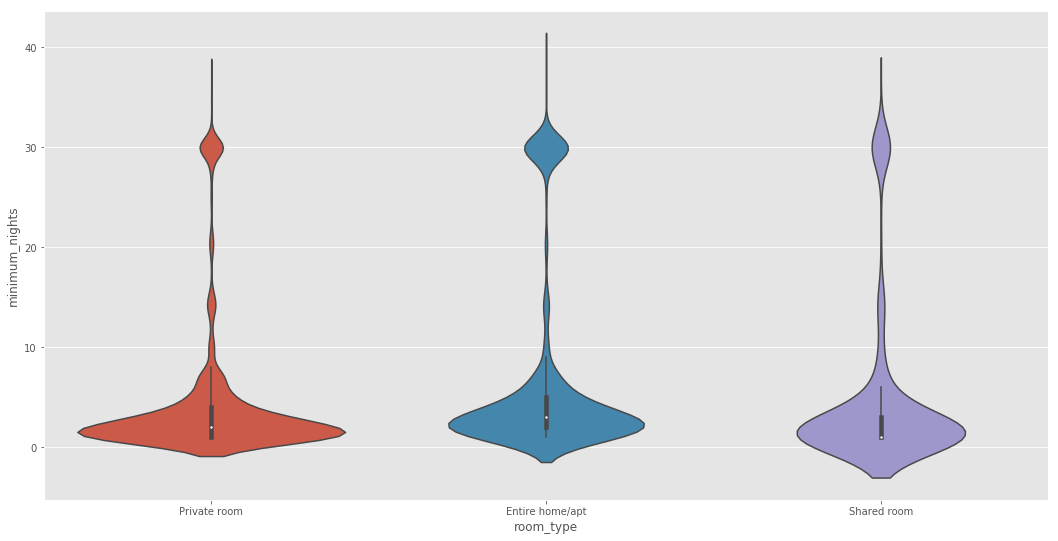

In [75]:
sns.violinplot(classic['room_type'], classic[classic.minimum_nights<40]['minimum_nights'])

همونطور که دیده میشه خونه هایی که اتاق اشتراکی هستن اکثرا یک روزه هستن و منطقی هم هست مثلا فرض کنیم یکی فقط یک کار اداری یک روزه داره و فقط ی جا برای وسایلش میخواد تا به کاراش برسه پس میره یه اتاق اشتراکی میگیره که ارزون تر باشه بخاطر همنی توی میانگین پایین تر هستن ولی همون طوری که دیده میشه اقامت های بیشتر کل خونه رو اجاره میکنن
و نکته ای که دیده میشه اون بازه ۳۰ روزه هست که ما بهش میگیم اجاره ماهانه 
این مدل قرارداد که طرف یک ماه تمام خونه رو اجاره کنه برای بیزینس من ها و افرادی هست ک در حال حرکت کار میکنن و مجبورن بازه ای مثلا ۳۰ روزه رو توی نیویورک برای کار یا تفریح باشن واین نمودار نشون میده ک ترجیه اونا بر اینه که کل خونه رو اجاره کن
پس اگر مثلا کنارمناطق اداری هستین بهتره کل خونتون رو ۳۰ روزه اجاره بدین 


## minimum_nights

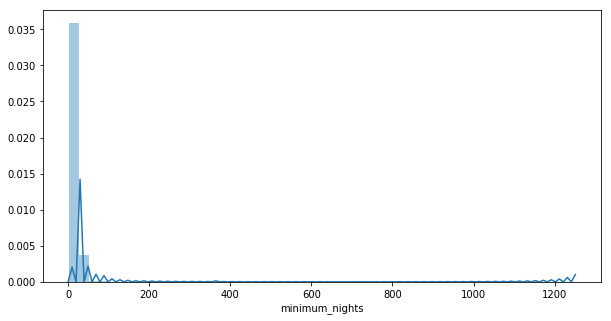

In [33]:
sns.distplot(classic['minimum_nights'])
fig = plt.gcf()
fig.set_size_inches(10,5)

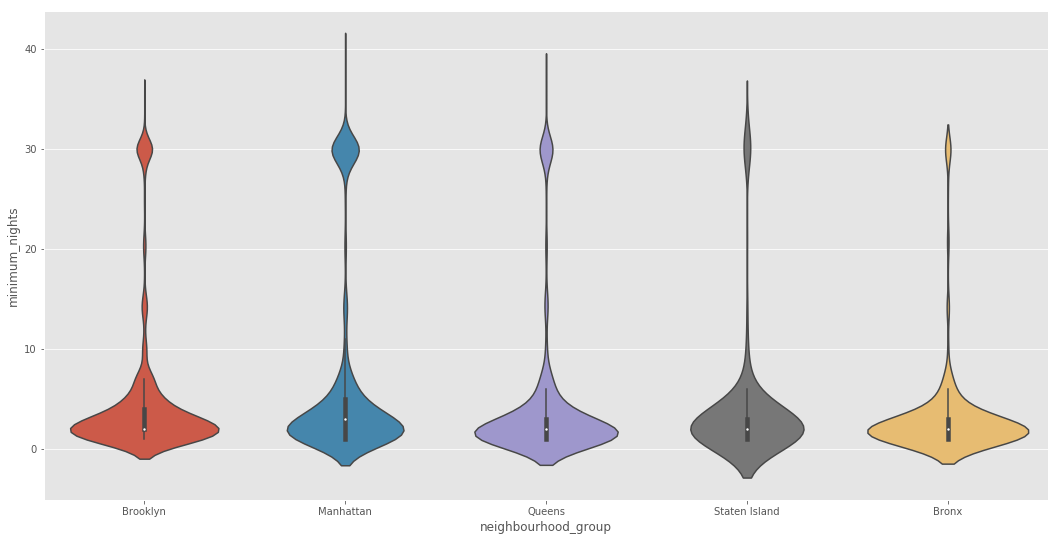

In [69]:
sns.violinplot(classic['neighbourhood_group'], classic[classic.minimum_nights<40]['minimum_nights'])

نکته قشنگ این نمودار این هست ک اجاره ماهانه توی منهتن بیشتره پس نتیجه ای که بالاتر گرفتیم درست میشه

## availability_365

E:\ProgramData\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


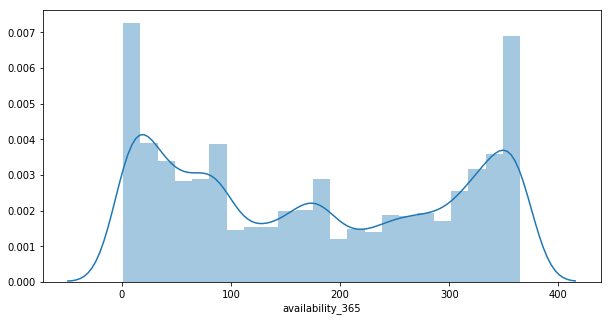

In [35]:
sns.distplot(classic[classic.availability_365>0]['availability_365'])
fig = plt.gcf()
fig.set_size_inches(10,5)

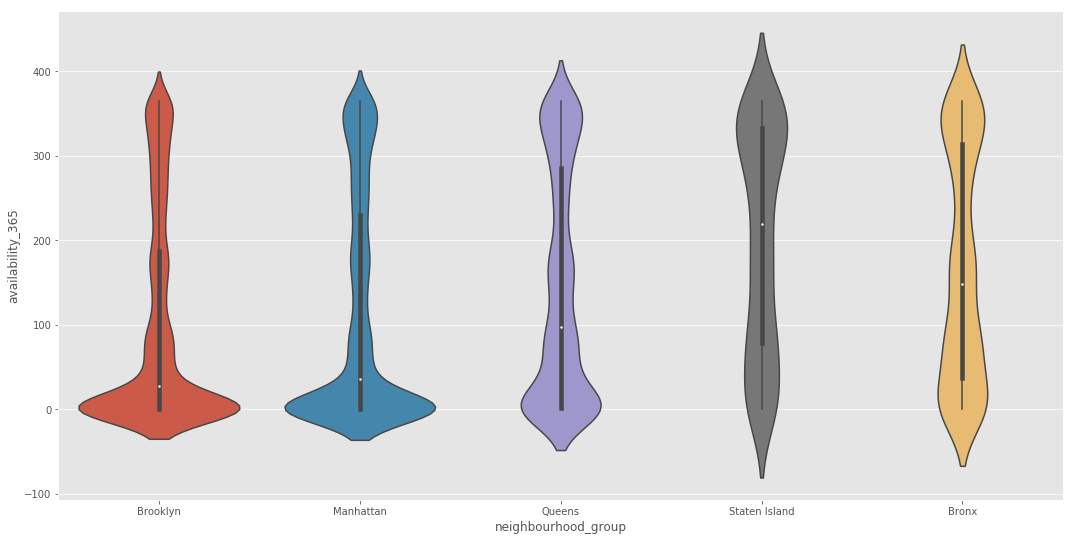

In [62]:
sns.violinplot(classic['neighbourhood_group'], classic['availability_365'])

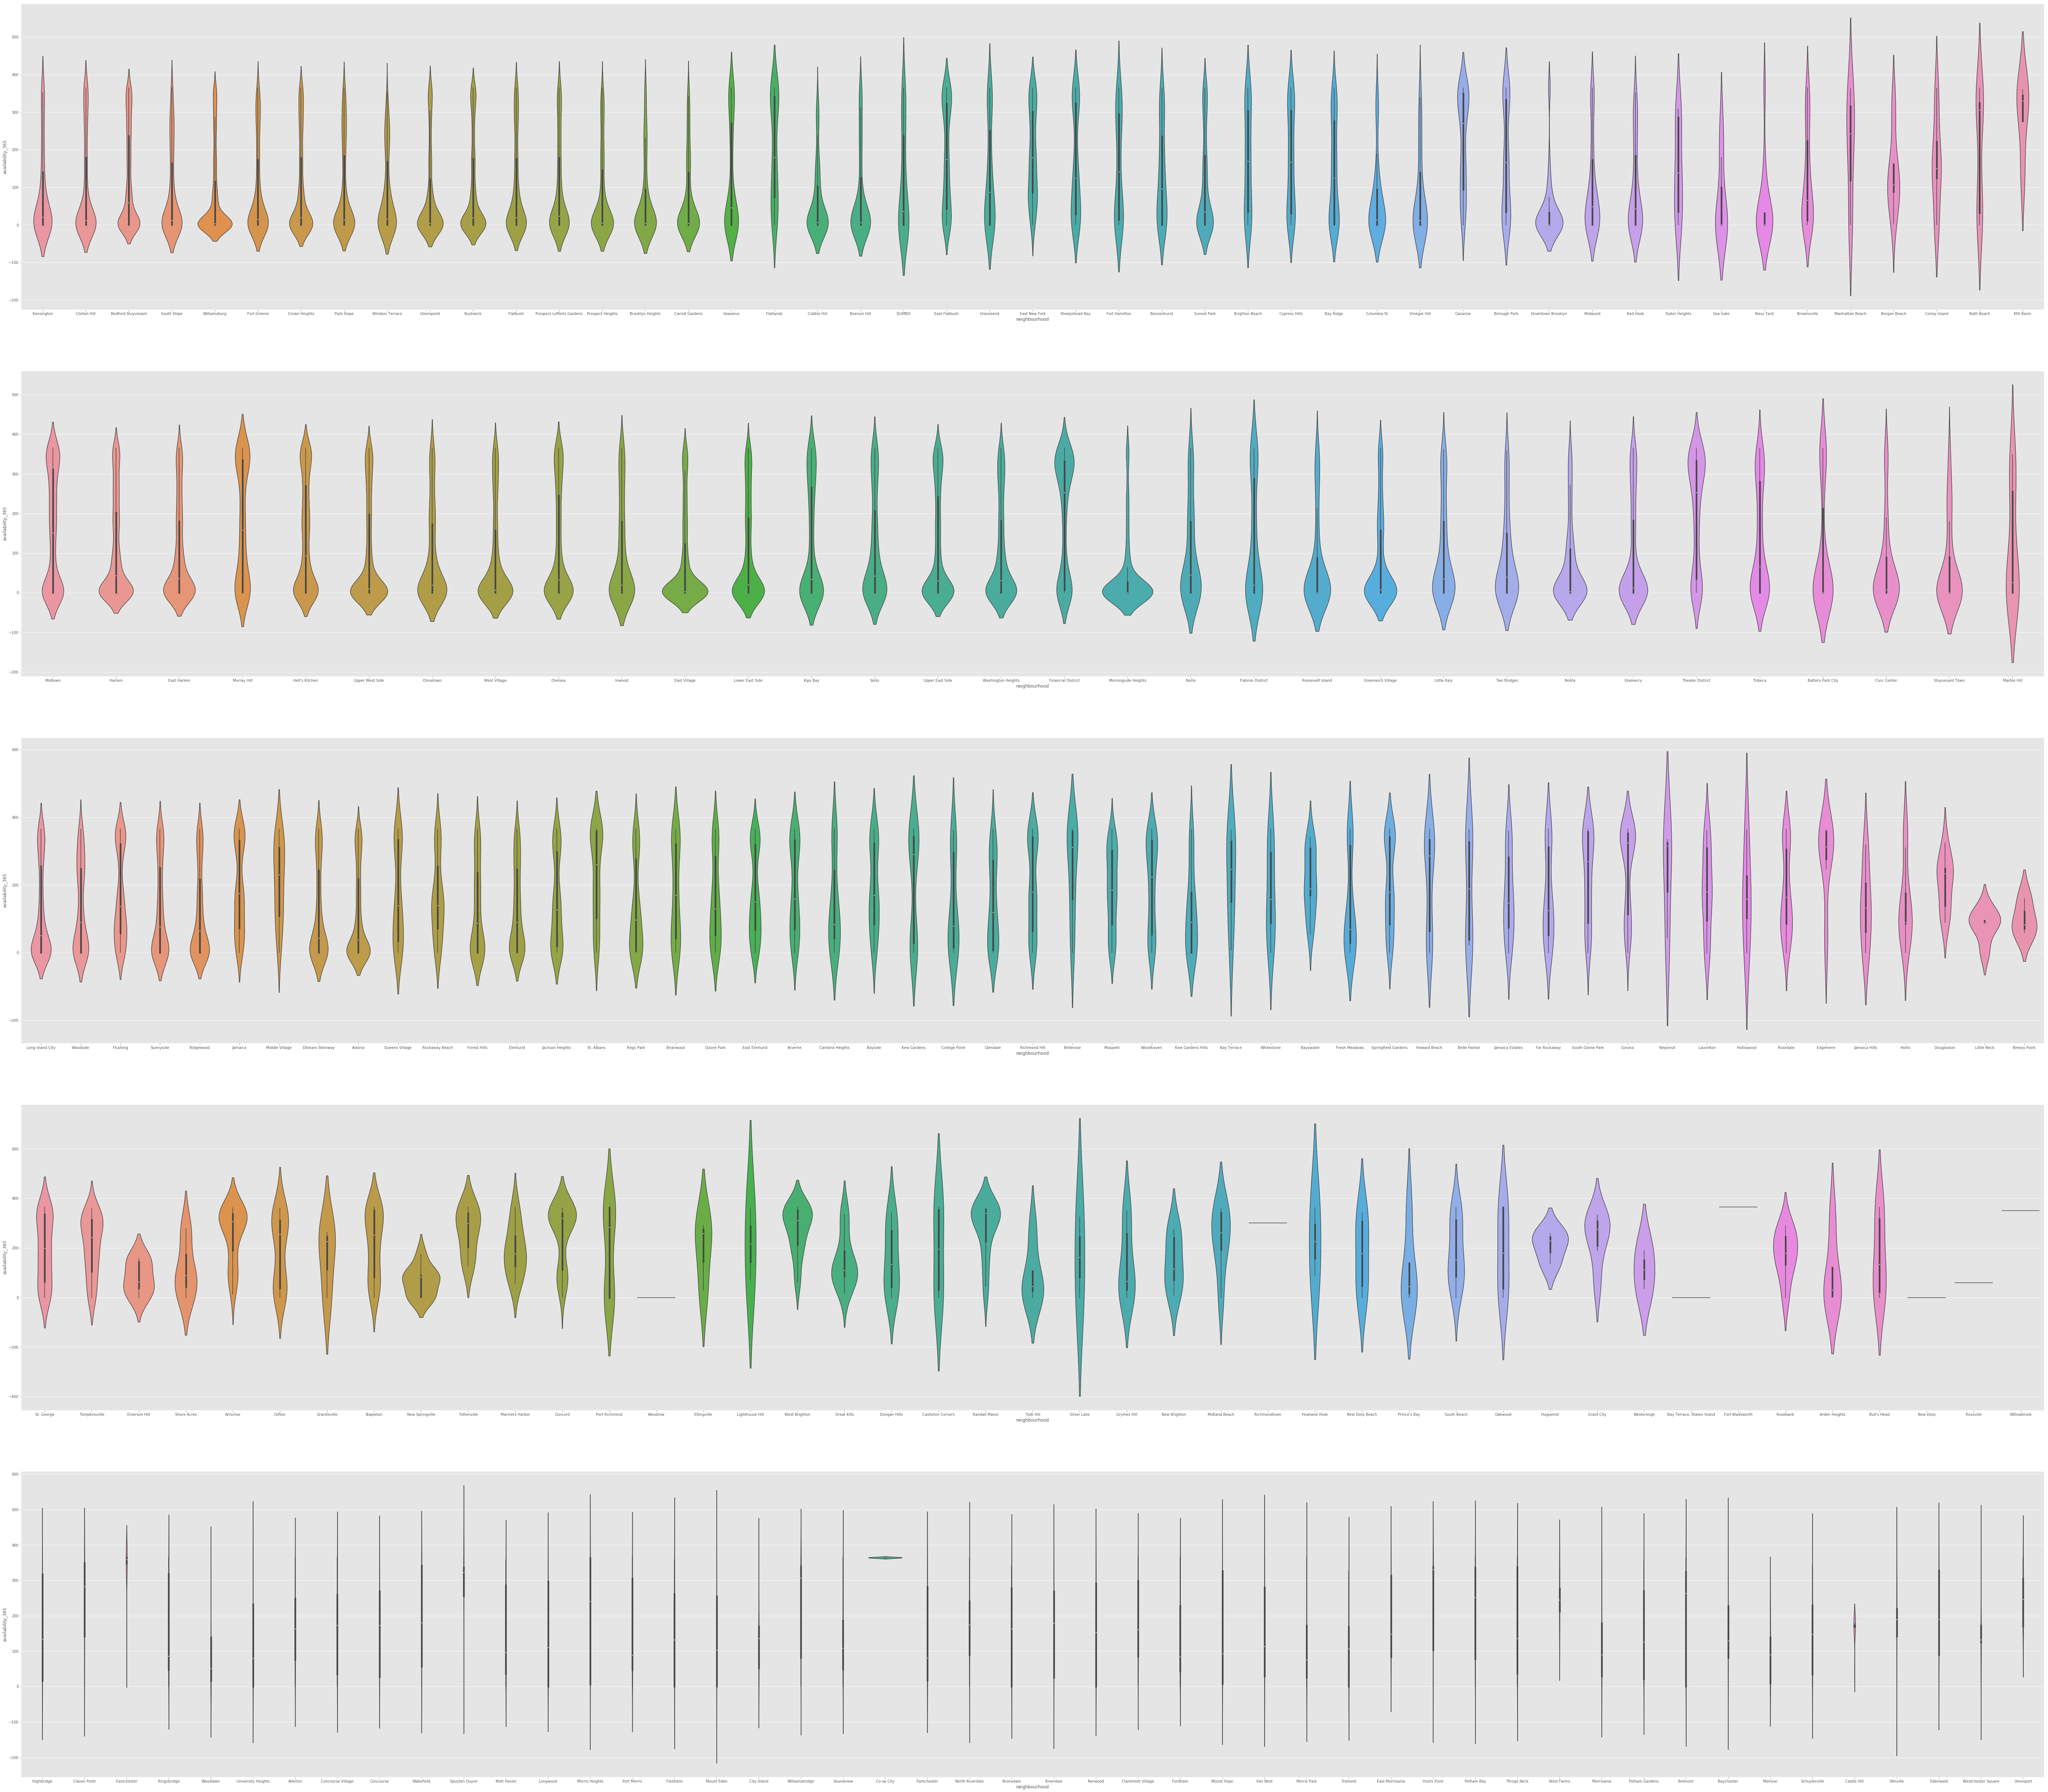

In [64]:
fig, axes = plt.subplots(5,1, figsize=(100,90))
sns.violinplot(classic[classic.neighbourhood_group=='Brooklyn']['neighbourhood'], classic['availability_365'],ax=axes[0])
sns.violinplot(classic[classic.neighbourhood_group=='Manhattan']['neighbourhood'], classic['availability_365'],ax=axes[1])
sns.violinplot(classic[classic.neighbourhood_group=='Queens']['neighbourhood'], classic['availability_365'],ax=axes[2])
sns.violinplot(classic[classic.neighbourhood_group=='Staten Island']['neighbourhood'], classic['availability_365'],ax=axes[3])
sns.violinplot(classic[classic.neighbourhood_group=='Bronx']['neighbourhood'], classic['availability_365'],ax=axes[4])
plt.show()

در نمودار های فیلد در دست رس بودن در طول سال نوع رویکرد ما اینطوریه که اگر یه منطقه توی میانگین بالاتر باشه ینی که ساختار هتل داری از طریق سایت توی اون جمع بیشتره ینی مثلا توی منطقه استاتن ایلند که بالاترین میانگین رو داره بیشتر خونه ها متعلق به هتل ها هستن یا افرادی که کارشون خرید خونه و اجاره دادن اون هستن هستن و کمتر یکی خونه خودش رو اجاره میده و بیشتر توریستی هستن 

از همین نمودار شنگ میشه نتیجه گرفت کدوم مناطق توریستی هستن و توریست بیشتر میره چون ساختار هتلی دارن 
حالا چرا؟
چون ساختار یک هتل اینطوریه که کل سال در دسترس باشه پس اگر تعداد هتل ها بیشتر باشه میانگین بالاتری بدست میاد 
ولی چرا هتل ها تکی و از طریق دیگه نرفتن مشتری جذب کنن . ایده اینه ک احتمال زیاد این مناطق مثل ساتاتن ایلند درسته توریستیه ولی احتمالا خیلی بزرگ و پیشرفته و معروف نیست و انتخاب اول توریست ها و مسافرا نیست پس هتل هایی ک توی این منطقه هستن ضعیف تر و محدود ترن بخاطر همین ترجیه دادن برای اینکه هزینه تبلیغات رو کم کنن از طریق این سایت مشتری بگیرن


تمام حرف هایی که بالاتر زدیم رو میشه در مورد محله های کوچیکتر زد و تمام استدلال هایی که در رابطه با قیمت ذکر کردیم بررسی کنیم و تمام اون حرفا اینجا ام صادقه 

### Make dictionary that contain neighbourhood_group and their neighbourhood

In [108]:
neighborhoods_for_each_group = {}
for ngh_group in neighbourhood_group:
    neighborhoods_for_each_group[ngh_group] = {}
    neighborhoods_for_each_group[ngh_group]["places"] = data[data.neighbourhood_group == ngh_group].neighbourhood.unique()
    print(ngh_group, ' -> ', neighborhoods_for_each_group[ngh_group]['places'].size)

Brooklyn  ->  47
Manhattan  ->  32
Queens  ->  51
Staten Island  ->  43
Bronx  ->  48


In [109]:
data[data.neighbourhood_group == "Bronx"].number_of_reviews.sum()
for ngh_group in neighborhoods_for_each_group:
    neighborhoods_for_each_group[ngh_group]["number_of_reviews"] = data[data.neighbourhood_group == ngh_group].number_of_reviews.sum()
# sns.barplot(y="neighbourhood_group", x="number_of_reviews", data=data)

کارهای که در کد های بالا انجام دادیم این بود که اومدیم یک دیکشنری ساختیم از محله ها که در هر محله اسم مناطق مربوط به اون محله رو نگه داری میکنه.
بعد اومدم برای اون مناطق هم نمودار جغرافیایی کشیدم که دیدم زیاد به کارمون نمیاد و حذفش کردم ولی این کد ها رو گذاشتم باشه چون بعد در یکیگذاری ۲۵۶ بیت دو جا ازشون استفاده شد

In [110]:
viz = []
for ngh in neighborhoods_for_each_group:
    viz.append([ngh, neighborhoods_for_each_group[ngh]['number_of_reviews']])
test = pd.DataFrame(viz, columns=['group', 'total_review'])

### Plot total_review of all neighbourhood_group (1)

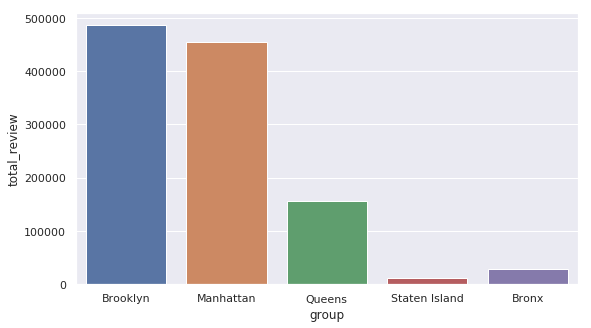

In [111]:
plt.figure(figsize=(9, 5))
sns.barplot(x= 'group', y='total_review', data=test)
plt.show()

#### Plot count of host in neighbourhood_group (2)

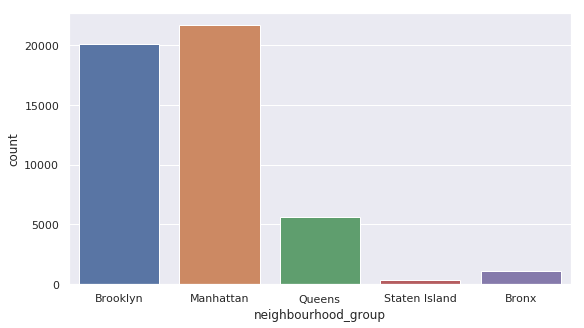

In [112]:
plt.figure(figsize=(9, 5))
sns.countplot(x="neighbourhood_group", data=data)
plt.show()

در قسمت ۱ نمودار مربوط به مجموع کامنت ها در هر مرحله رو نشون دادیم و در نمودار ۲ تعداد کل میزبان ها رو در ۵ محله مختلف نشان دادیم
همون جوری که نمودار ها نشان میدهند تعداد کل کامنت ها یا ریو ها در محله های 
Queens, staten island, brox
با تعداد میزبان ها در این ۳ محله روند یکسانی دارند ولی برای محله های
Manhatan, Brooklyn
برعکس است است
یعنی تداد کامنت ها در محله 
Brooklyn 
بیشتره نسبت به 
Manhatan
ولی در تعداد میزبان ها
Manhatan
بیشتر از 
Brooklyn
هست

حالا یه نتیجه دیگه هم میشه گرف با کمک نمودار 0 .توی اونجا فک کردیم که محله کویین باید تعداد بیشتری میزبان داشته باشه نسبت به محله منهتن ولی نمودار ۲ داره این رو رد میکنه پش نتیجه ای که میشه گرفت اینه که محله کویین بزرگتر از محله منهتن هستش و میزبان ها در محله کویین پراکنده تر هستند ولی در محله منهتن که کوچک تره ولی تراکم میزبان ها خیلی بیتشر عه و در کلن تعداد میزبان ها در منهتن بیشتر از بقیه محله ها من جمله کویین هستش.

 ### Relation between neighbourhood_group and other fileds

#### neighbourhood_group with price (3)

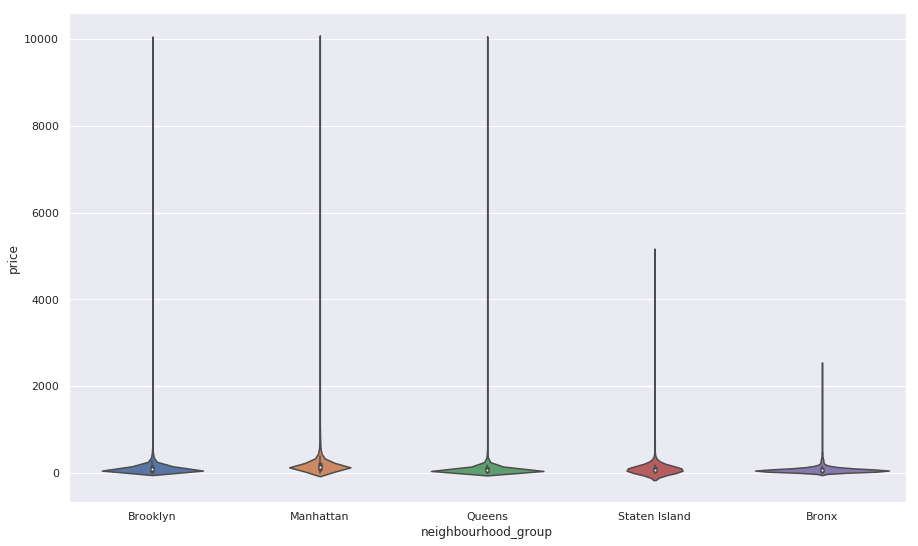

In [113]:
plt.figure(figsize=(15, 9))
sns.violinplot(x='neighbourhood_group', y='price', data=data)

#### plot number (4)

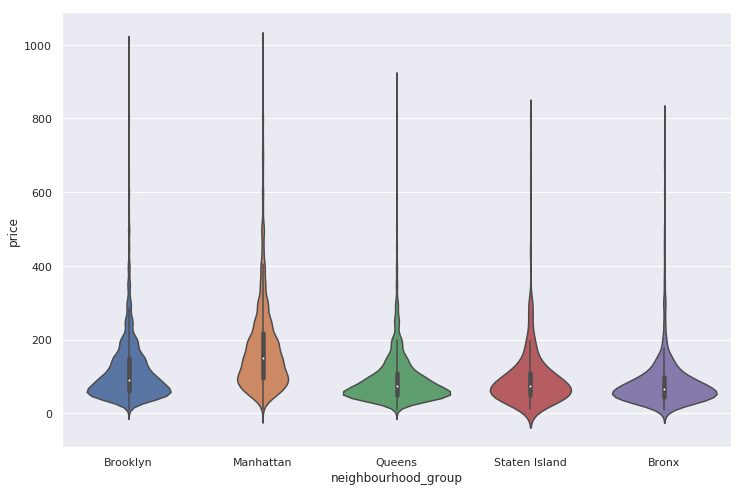

In [114]:
plt.figure(figsize=(12, 8))
sns.violinplot(x='neighbourhood_group', y='price', data=data[data['price'] < 1000])

نمودار ۴ همون نمودار ۳ هست فقط چون فرکونسی قیمت ها زیاد است نمودار ها در شکل ۳ به خوبی مشخص نیستند به خاطر همین نمودار شماره ۴ رو با محدود کردن فرکونسی قیمت تا کمتر از ۱۰۰۰ رسم کردیم که نمودار ها بهتر نشان داده شوند
همون طور که از شکل مسخش است میانگین قیمت خانه ها در 
Manhatan 
بیشتر از بقیه هست و میانگین قیمت ها یکی نیست
حالا برای اثبات این ادعا از تست های آماری کمک میگیرم
برای این فرض از تست 
ANOVA 
استفاده میکنیم

##### ANOVA TEST for mean of price in neighbourhood_group

In [115]:
brooklyn_price = data[data['neighbourhood_group'] == 'Brooklyn'].price.values
manhatan_price = data[data['neighbourhood_group'] == 'Manhattan'].price.values
queens_price = data[data['neighbourhood_group'] == 'Queens'].price.values
staten_island_price = data[data['neighbourhood_group'] == 'Staten Island'].price.values
bronx_price = data[data['neighbourhood_group'] == 'Bronx'].price.values

In [116]:
stats.f_oneway(bronx_price, manhatan_price, queens_price, staten_island_price, brooklyn_price)

F_onewayResult(statistic=354.12630761916523, pvalue=4.208501569800712e-301)

because p-value is too small alternative hypothesis is true. it means that price mean in **neighbourhood_group** are diffrent

خوب این تست هم داره فضیه ما که یکسان نبودن میانگین قیمت محله هاست رو تایید میکنه ... فقط باید حواسمون باشه که این فرض صفر این کتابخونه یکسان بودن میانگین هاست حالا با توجه به این که مقدار 
p-value
خیلی کمتر از مقدار الفا که 0.05 هستش هست
پس فرض صفرمون رد میشه یعنی میانگین ها برابر نیستن 

### Frequency amount of price

#### plot number (5)

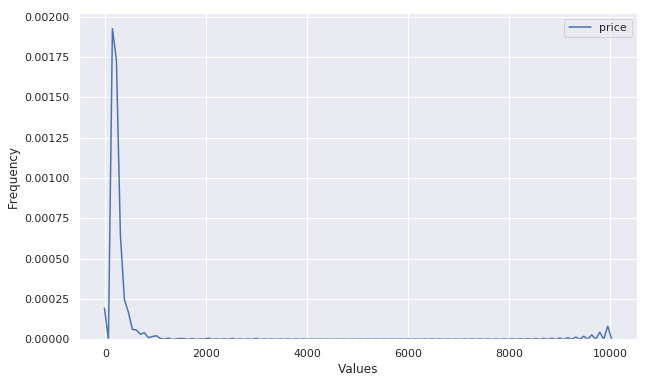

In [117]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data['price'])
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()
# useful for bining price

In [118]:
price_mean = data['price'].mean()
price_std = data['price'].std()
print('price mean = ', price_mean)
print('price std = ', price_std)
print('price min = ', data['price'].min())
print('price max = ', data['price'].max())

price mean =  152.77470469015498
price std =  240.24849763081855
price min =  10
price max =  10000


برای این که کارمون با قیمت راحت بشه میخوایم قیمت رو بین بندی کنیم برای این کار ابتدا نمودار فرکونسی قیمت داده ها رو رسم کردیم و بعد میانگین و انحراف و مقدار ماکسیمم و مینیمم قیمت رو به دست اوردیم وبر اساس اون قیمت رو به ۴ دسته تبدیل کردیم

## bining price -> [10, 153, 393, 633, 10000]

In [119]:
# bining price
price_bins = [10, 153, 393, 633, 10000]
labels = [1, 2, 3, 4]
data['price_bin'] = pd.cut(data['price'], bins = price_bins, labels = labels)

### count of each neighbourhood_group in each price bins

#### plot number (6)

<Figure size 1440x864 with 0 Axes>

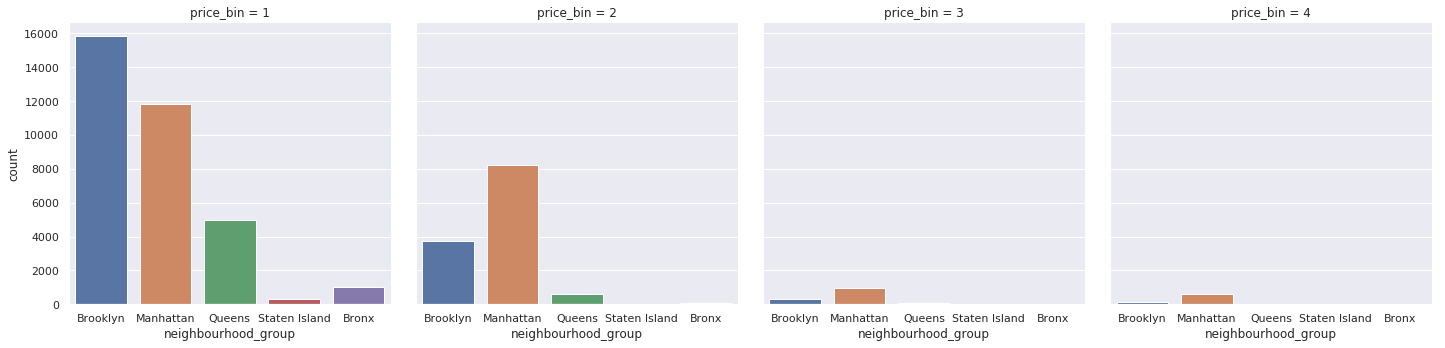

In [120]:
plt.figure(figsize=(20, 12))
sns.catplot(x='neighbourhood_group',col='price_bin', kind='count', data=data)
plt.show()

#### plot number (7)

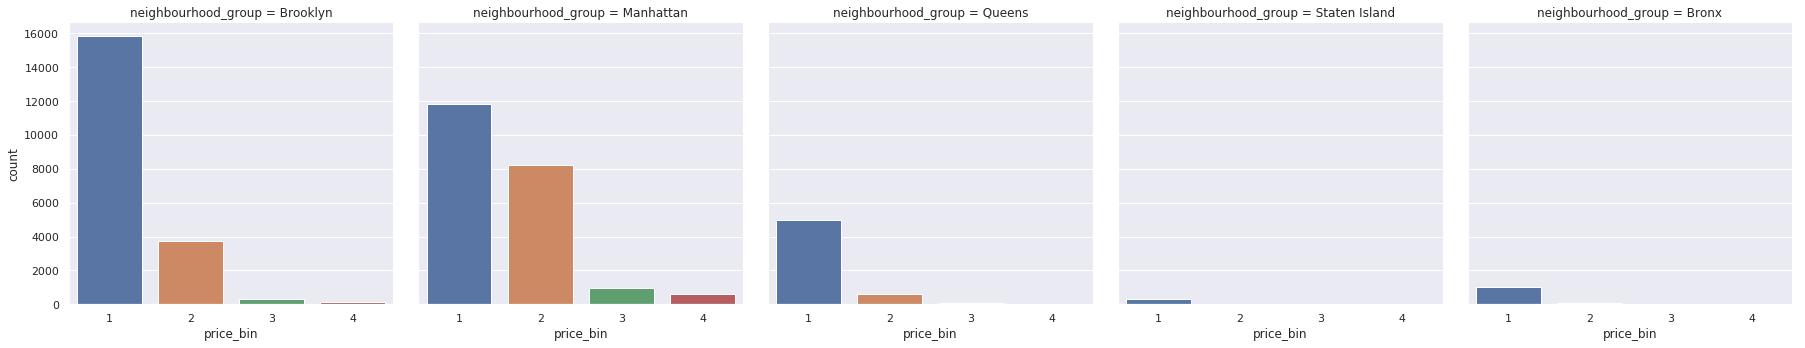

In [121]:
sns.catplot(x='price_bin',col='neighbourhood_group', kind='count', data=data)

توی نمودار ۶ اومدیم تعداد میزبان ها در محله های مختلف با بین های ک در قسمت قبلیش درست کردیم مقایسه کردیم ... همون طور که  میبینیم تعداد میزبان های که دربین خیلی ازون هستند برای محله بروکلین تعدادشون بیشتر از همه هست یعنی این محله ازرون ترین خون ها رو داره و در بین های بعدی تعداد خونه های محله منهتن بیشتر که همین طور هم انتظار میرفت ... چون میانگین قیمت خونه ها در منهتن بیشتر بودش همین رو هم میتونیم اینجا ببینیم که تعداد خونه ها در محله منهتن که با قیمت بیشتر در بیشتر از بقیه محله هاست
نمودار ۷ هم همون نمودرا ۶ عه فقط جای بین قیمت ها جای محله ها عوض شده

### Relationb between minimum_nights and price

#### frequency amount of minimum_nights (7)

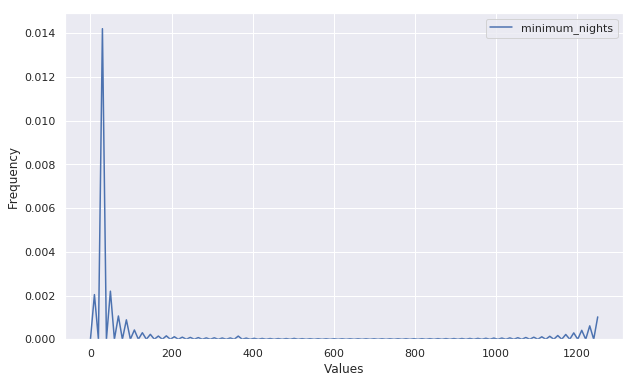

In [122]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data['minimum_nights'])
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

In [123]:
print('minimum_nights mean =', data['minimum_nights'].mean())
print('minimum_nights std =', data['minimum_nights'].std())

minimum_nights mean = 7.012365140131431
minimum_nights std = 20.02136215911567


In [124]:
print('minimum_nights min =', data['minimum_nights'].min())
print('minimum_nights max =', data['minimum_nights'].max())

minimum_nights min = 1
minimum_nights max = 1250


برای این که با این قیچر یعنی مینیم شی اجاره بهتر آشنا بشیم مقدار رکونسی اون و میانگین و بقیه چیاش رو به دست اوردیم

### plot count host in each minimum_nights (8)

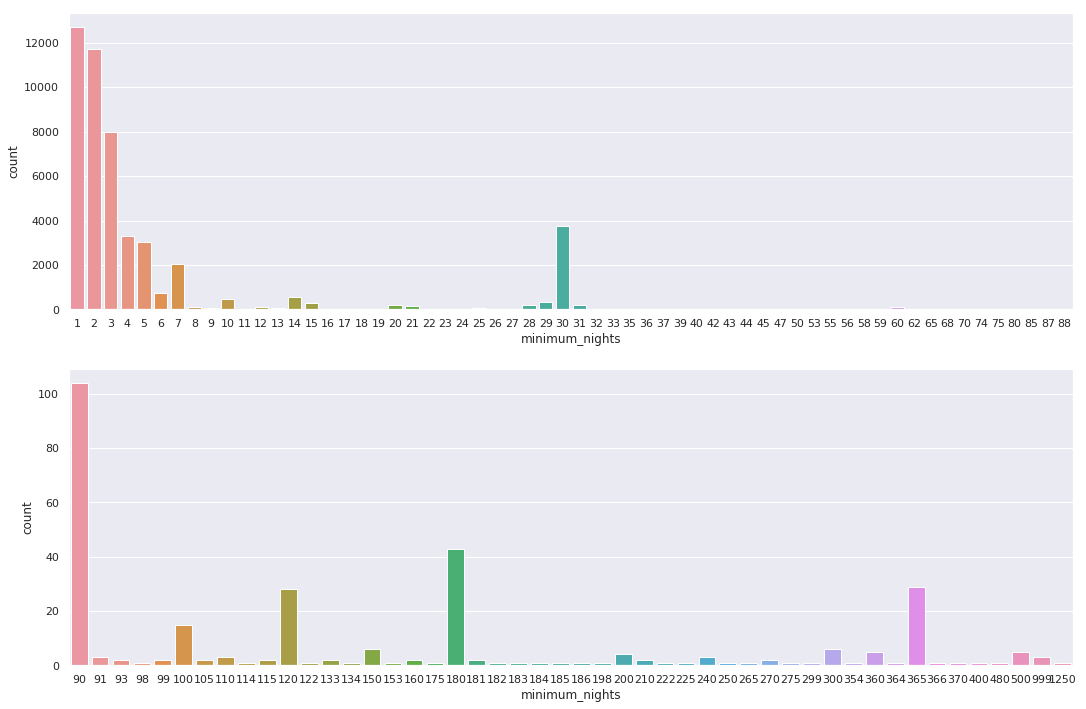

In [125]:
# plt.figure(figsize=(20, 15))
fig, axes = plt.subplots(2,1, figsize=(18,12))
sns.countplot(x='minimum_nights', data=data[data['minimum_nights'] <= 89 ],  ax=axes[0])
sns.countplot(x='minimum_nights', data=data[data['minimum_nights'] > 89 ],  ax=axes[1])
plt.show()

#### plot number (9)

<Figure size 1440x1080 with 0 Axes>

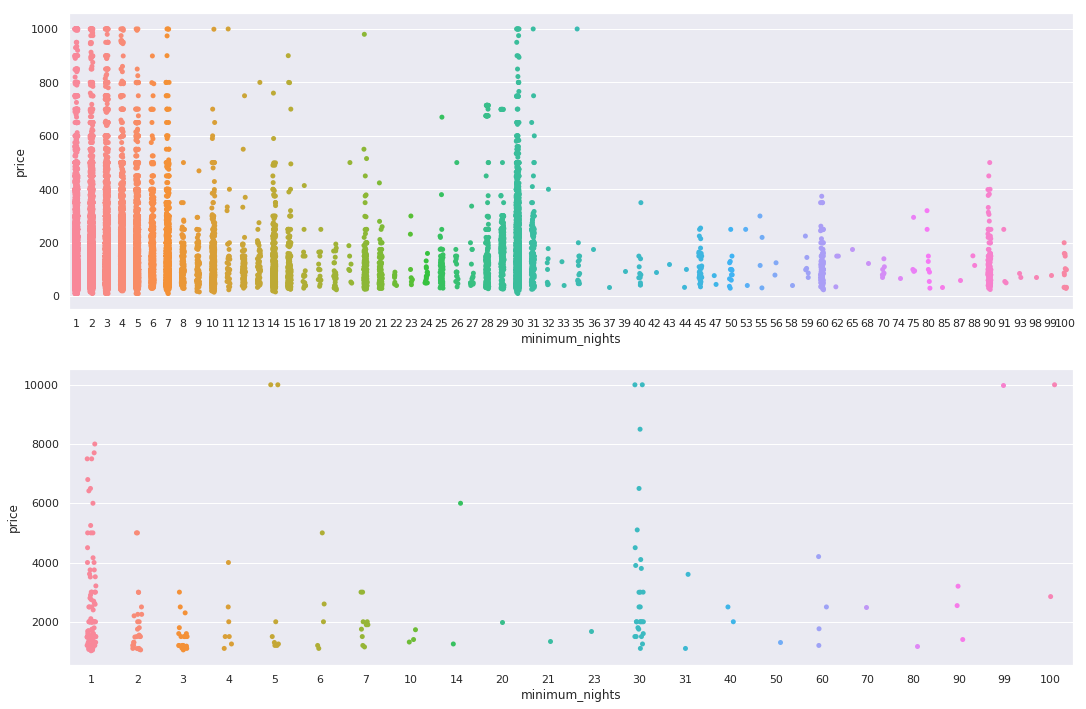

In [126]:
plt.figure(figsize=(20, 15))
fig, axes = plt.subplots(2,1, figsize=(18,12))
data_min_night_100 = data[data['minimum_nights'] <= 100]
sns.stripplot(x='minimum_nights', y='price', data=data_min_night_100[data_min_night_100['price'] <= 1000], ax=axes[0])
sns.stripplot(x='minimum_nights', y='price', data=data_min_night_100[data_min_night_100['price'] > 1000], ax=axes[1])
plt.show()

اومیدم تعداد خونه هایی که مینیم شبشون به ازای روز های مختلف رو تعدادشون رو پلات کردیم  
همون طور که میبینم تعداد خونه هایی که مینیم شب اجارشون یک عه بیشتر همست و بقیه کمتر و سیر نزولی تا عدد ۳۰ که مقدار اون خیل بیتشر از اعداد اطرافش عه 
اونم به خاطر این ۳۰ شب میشه یه ماه و بعضی خونه ها تمایل زیادی داره که خونشون حداقل یک ماه 
اجاره بره


توی نمودرا شماره ۹ هم نمودار قیمت خونه ها به ازای حداقل شب های اجاره نشون داده میشه 

In [127]:
data[data['minimum_nights'] >= 30].size

67545

/home/alireza/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


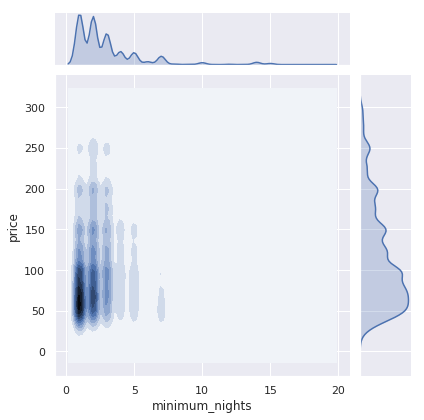

In [128]:
sns.jointplot(data=data[data.price<300][data.minimum_nights<20],x="minimum_nights",y='price',kind="kde")
# sns.lmplot(data=data[data.price<600][data.minimum_nights<100],y="minimum_nights",x='price')
plt.show()

### plot price_bin and minimum_nights (10)

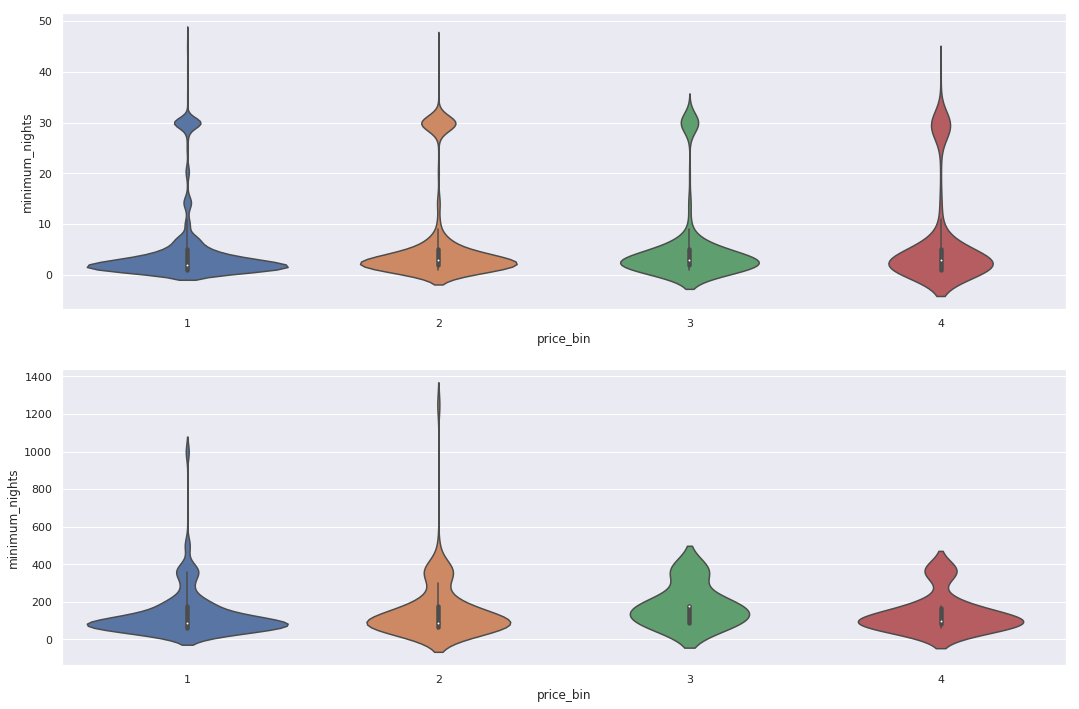

In [129]:
fig, axes = plt.subplots(2,1, figsize=(18,12))
sns.violinplot(x='price_bin', y="minimum_nights", data=data[data.minimum_nights < 50 ], ax=axes[0])
sns.violinplot(x='price_bin', y="minimum_nights", data=data[data.minimum_nights > 50 ], ax=axes[1])
plt.show()

In [130]:
price_bin_1 = data[data.price_bin == 1].minimum_nights.values
price_bin_2 = data[data.price_bin == 2].minimum_nights.values
price_bin_3 = data[data.price_bin == 3].minimum_nights.values
price_bin_4 = data[data.price_bin == 4].minimum_nights.values

امدیم ببنیم مقدار حداقل شب اجاره با قیمت خونه ها رابطه داره یا نه ... ایتدا نمودار اون رو رسم برای این کار دو تا نمودار کشیدیم که جزیات بهتری بتونیم دریافت کنیم
توی نمودار ها وایلون پلات حداقل مینیم شب اجاره به ازای قیمت های مختلف که قبلا بین بندی کرده 
بودیم هستش

برای این که ببنیم ایا حداقل شب اجاره در قیمت خونه اثر داره یا نه برای تست درستی این فرض از 
ANOVA 
استفاده کردیم

### ANOVA for mean of minimum_nights in each price_bin 

In [131]:
# note: 
#  this is ANOVA test is for all data not just for those minimum_nights  < 40
stats.f_oneway(price_bin_1, price_bin_3, price_bin_4)

F_onewayResult(statistic=15.653877892980217, pvalue=1.6015938901792606e-07)

در ابتدا همه دسته بین های قیمت رو در تست شرکت دادیم که فرض صفرمون یعنی برابر بودن میانگین های حداقل شب برای هر دسته قیمت رو رد میکرد اما وقتی همین تست وقتی که با حذف دسته قیمت دوم انجام دادیم فرض صفرمون رد نشد 
در مجموع این گونه میتونیم نتیجه گیری کنیم که میانگین حداقل شب اجاره در با قیمت بین های اول و سوم و چهارم  یعنی قیمت ها در بازه های ۱۰ تا ۱۵۳ و ۳۹۳ تا ۶۳۳ و ۶۳۳ تا ۱۰۰۰۰ یکی است ولی میانگی حداقل شب اجاره در بین دوم یعنی قیمت بین ۱۵۳ تا ۳۹۳ با دیگر دسته ها فرق داره.

اطلاعات زیر هم همین موضوع رو تایید میکنه به صورتی که میانگی حداقل شب در دسته های ۱ و ۳ و ۴ برابر با ۶ است ولی در دسته ۲ برابر ۸ است

In [132]:
print("mean")
print("price_bin_1 : ", data[data.price_bin == 1].minimum_nights.mean())
print("price_bin_2 : ", data[data.price_bin == 2].minimum_nights.mean())
print("price_bin_3 : ", data[data.price_bin == 3].minimum_nights.mean())
print("price_bin_4 : ", data[data.price_bin == 4].minimum_nights.mean())

mean
price_bin_1 :  6.569271967512212
price_bin_2 :  8.01447223533113
price_bin_3 :  6.7468910021945865
price_bin_4 :  10.571056062581487


In [133]:
data[data.minimum_nights > 100].size

2595

In [134]:
min_night_30 = data[data.minimum_nights == 30]
min_night_30.head()

name  host_id host_name  \
55               Williamsburg 1 bedroom Apartment    56512    Joanna   
59  **Bright Nolita Apt w Doorman/Elevators/Gym**    60049       Ted   
63     Comfortable 4-bedroom apt in family house.    63588   Dimitri   
65                   Your Heaven in Hells Kitchen    63924      Mark   
77                          Little King of Queens    70091    Justin   

   neighbourhood_group     neighbourhood  latitude  longitude  \
55            Brooklyn      Williamsburg  40.70881  -73.95930   
59           Manhattan              SoHo  40.72210  -73.99775   
63            Brooklyn  Prospect Heights  40.67811  -73.96428   
65           Manhattan    Hell's Kitchen  40.75979  -73.99119   
77              Queens          Woodside  40.75038  -73.90334   

          room_type  price  minimum_nights  number_of_reviews  \
55  Entire home/apt    150              30                105   
59  Entire home/apt    180              30                 21   
63  Entire home/apt    200              30                143   
65     Private room     52              30                191   
77     Private room     70              30                 25   

    reviews_per_month  calculated_host_listings_count  availability_365  \
55               0.90                               1                30   
59               0.30                               1               154   
63               1.33                               2               297   
65               1.65                               1               191   
77               0.22                               1               324   

   price_bin  
55         1  
59         2  
63         2  
65         1  
77         1

### count of minimum_nights that are equal 30 for each price_bin

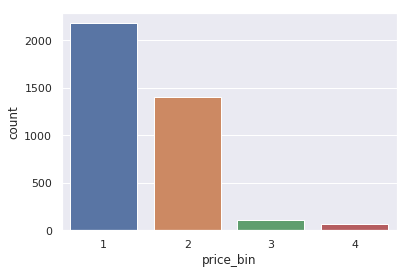

In [135]:
sns.countplot(x='price_bin', data=min_night_30)

In [136]:
print("mean")
print("price_bin_1 : ", len( min_night_30[min_night_30.price_bin == 1]))
print("price_bin_2 : ", len(min_night_30[min_night_30.price_bin == 2]))
print("price_bin_3 : ", len(min_night_30[min_night_30.price_bin == 3]))
print("price_bin_4 : ", len(min_night_30[min_night_30.price_bin == 4]))

mean
price_bin_1 :  2182
price_bin_2 :  1402
price_bin_3 :  109
price_bin_4 :  63


#### Relationb between minimum_nights and location

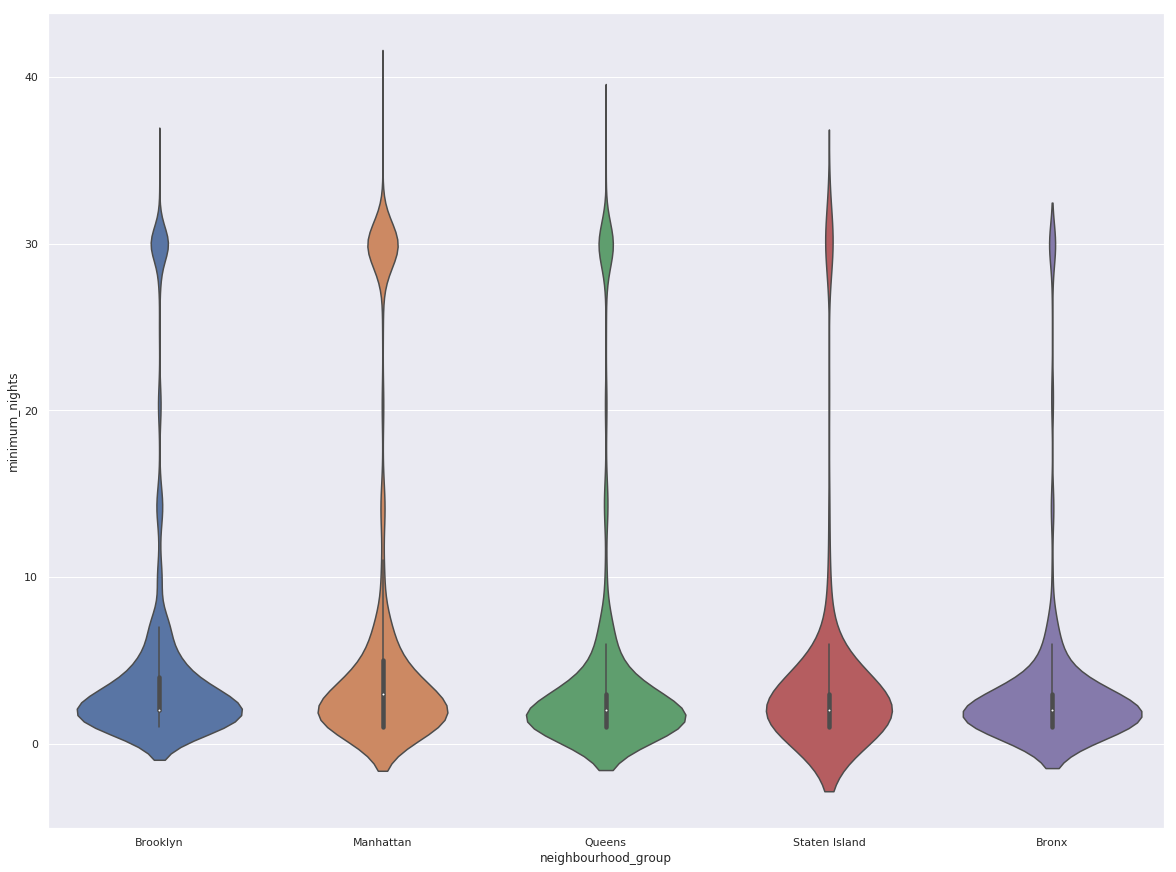

In [137]:
plt.figure(figsize=(20, 15))
sns.violinplot(x='neighbourhood_group', y='minimum_nights', data=data[data['minimum_nights'] < 40])
plt.show()

In [138]:
Brooklyn_night = data[data.neighbourhood_group == 'Brooklyn'].minimum_nights.values
Monhatan_night = data[data.neighbourhood_group == 'Manhattan'].minimum_nights.values
Queens_night = data[data.neighbourhood_group == 'Queens'].minimum_nights.values
Stateen_Island_night = data[data.neighbourhood_group == 'Staten Island'].minimum_nights.values
Bronx_night = data[data.neighbourhood_group == 'Bronx'].minimum_nights.values

In [139]:
print("mean")
print("Brooklyn_night : ", Brooklyn_night.mean())
print("Monhatan_night : ", Monhatan_night.mean())
print("Queens_night : ", Queens_night.mean())
print("Stateen_Island_night : ", Stateen_Island_night.mean())
print("Bronx_night : ", Bronx_night.mean())

mean
Brooklyn_night :  6.056623505976096
Monhatan_night :  8.538443766749838
Queens_night :  5.182909604519774
Stateen_Island_night :  4.831099195710456
Bronx_night :  4.567095588235294


مثل دفعه قبل که دنبال ارتباطی بین حداقل شب اجاره و قیمت بودیم این دفعه دنبال ارتباط بین حداقل شب اجاره و لوکیشن هستیم که بینم ایا در محله های مختلف حداقل شب اجاره ها فرق دارند یا نه برای این کار دوبار از تست آنووا کمک میگیریم 
قبل از این که تست رو اجرا کنیم میانگین حداقل شب اجاره برای محله های مختلف رو پیدا کردیم .... همون طور که مشاهده میشه میانگین حداقل شب اجاره در لوکیشن های مختلف متفاوت عه و جالبیش اینه که منهتن که میانگین قیمتی بالاتری نسبت به همه لوکیشن ها داره در این جا هم میانگین حداقل شب اجاره ش هم از همه بالاتر هست 

### ANOVA for mean of minimum_nights in each neighbourhood_group

In [140]:
stats.f_oneway(Brooklyn_night, Monhatan_night, Queens_night, Stateen_Island_night, Bronx_night)

F_onewayResult(statistic=60.150404756022375, pvalue=9.205204002897539e-51)

خب همین جوری که میبینیم مقدار پی ولیو از مقدار آلفا کوچک تره پس فرض صفر که برابر بودن میانگین حداقل شب اجاره برای هر محله ای هست رد میشه که طبیعی هم هست طبق نمودار بالا انتظارش رو هم داشتیم

#### Trim mean

In [141]:
# trim mean data
print("trim mean")
print("Brooklyn_night : ", stats.trim_mean(Brooklyn_night, 0.1))
print("Monhatan_night : ",stats.trim_mean(Monhatan_night, 0.1))
print("Queens_night : ", stats.trim_mean(Queens_night, 0.1))
print("Stateen_Island_night : ", stats.trim_mean(Stateen_Island_night, 0.1))
print("Bronx_night : ", stats.trim_mean(Bronx_night, 0.1))

trim mean
Brooklyn_night :  3.104581673306773
Monhatan_night :  5.098937276192676
Queens_night :  2.409973521624007
Stateen_Island_night :  2.31438127090301
Bronx_night :  2.161697247706422


خب حالا سه سوالی که برام پیش اومد این بود که رنج داده های حداقل شب اجاره زیاد عه بین ۱ تا ۱۲۰۰ که این ۱۲۰۰ هم فقط یه دونه هست که اونم از قضا توی منهتن هستش 
نکنه که همین دیتاهایی مثل که پرت هستند باعت بشه که میانگین حداقل شب اجاره برای لوکیشن های مختلف فرق کنه به خاطر همین اومد از 
trim mean 
استفاده کردم که همون طر که توی بالا میبینیم بازم مثل میانگین قبلی میانگین حداقل شب اجاره برای منهتن هنوز هم بیشتر ولی برای بقیه محله ها یکسان شده
خواستم برای این
trim mean
هم تست بزنم ولی نمیدونم که آیا برای  تست آنووا هم میشه از
trim mean 
استفاده کرد یا نه 

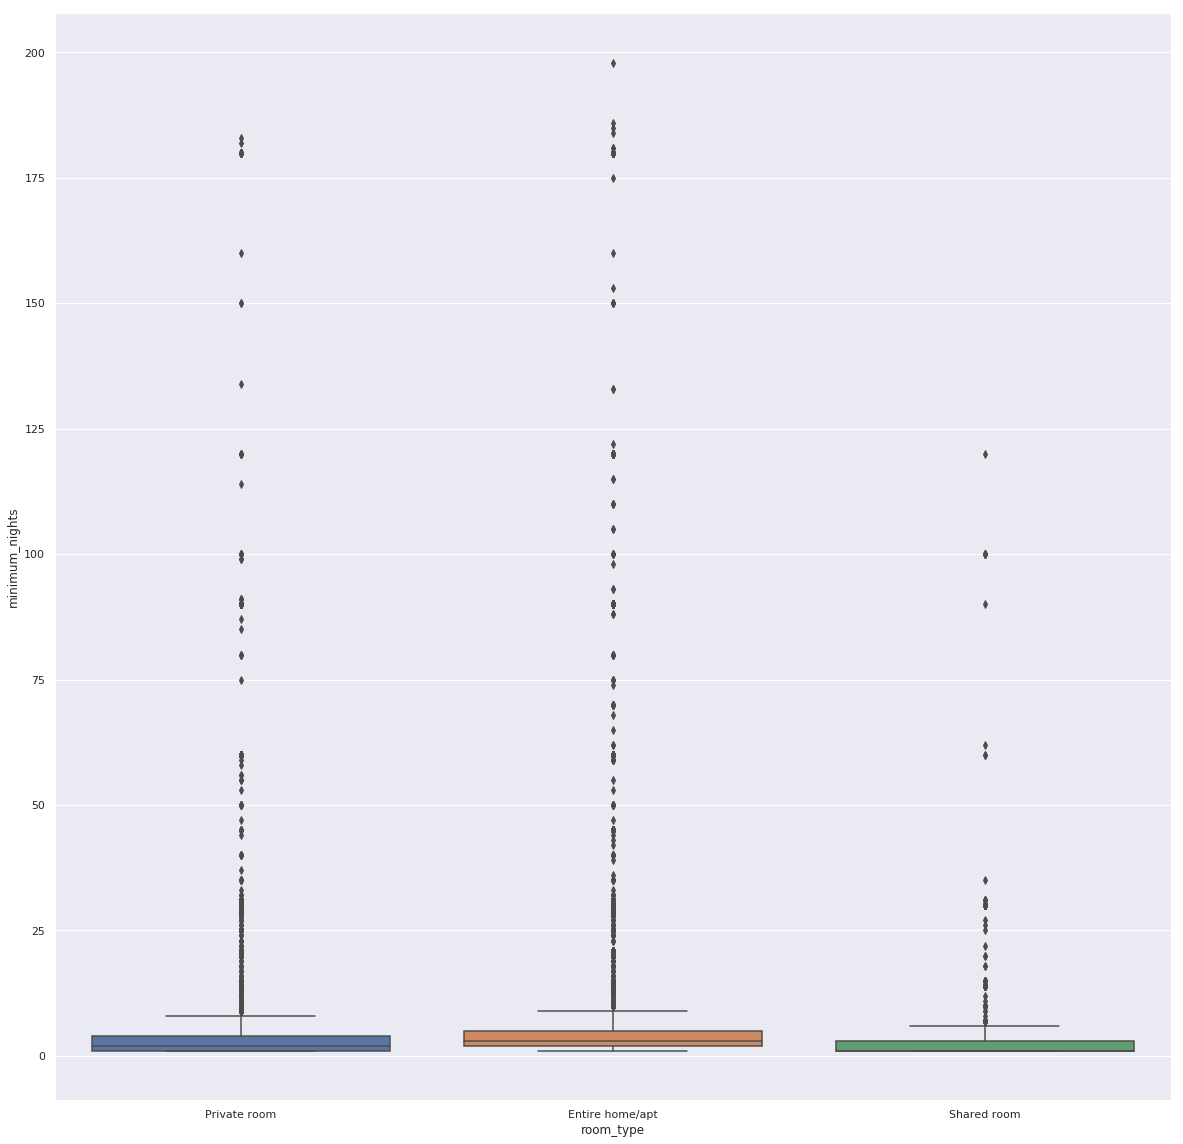

In [142]:
plt.figure(figsize=(20, 20))
sns.boxplot(x='room_type', y='minimum_nights', data=data[data.minimum_nights < 200])
plt.show()

In [143]:
private_room_night = data[data.room_type == 'Private room'].minimum_nights.values
entire_room_night = data[data.room_type == 'Entire home/apt'].minimum_nights.values
shared_room_night = data[data.room_type == 'Shared room'].minimum_nights.values

In [144]:
print("mean")
print("private : ", private_room_night.mean())
print("entire : ", entire_room_night.mean())
print("shared : ", shared_room_night.mean())

mean
private :  5.381855688595901
entire :  8.470442282698594
shared :  6.439066551426102


In [145]:
print("mean")
print("private : ", stats.trim_mean(private_room_night, 0.1))
print("entire : ", stats.trim_mean(entire_room_night, 0.1))
print("shared : ", stats.trim_mean(shared_room_night, 0.09))

mean
private :  2.6099433888234964
entire :  5.053906365381775
shared :  2.724973656480506


یکی از چیز هایی که به ذهنمون اومد این بود که حداقل شب اجاره با نوع خونه چه ارتباطی میتونه داشته باشه. ابتدا باکس پلات انواع خونه برای حداقل شب اجاره رو رسم کردیم همون طور میبینیم میانگی حداقل شب اجاره برای کل خونه بیشتر از دو تا نوع دیگست که این نتیجه قابل انتظار بود ولی نکته عجیب اینه که حدقل شب اجاره برای نوع خونه های شیر روم بیشتر از پرایوت روم هستش انتظار میرفت برعکس باشه.
در این جا از میانگین تریم یا اصلاح شده هم استفاده کردیم که همون طور که میبینیم میانیگی شیر روم و پرایوت رو یکی شدن و همچنان میانگی اینتایر بالاتر است

### rebace ://

ما در قسمت های قبل اومده بودیم برای راحتی قیمت بین بندی کردیم ولی این کار هم بر اساس میانگین و واریانس انجام دادیم 
اما یه روش دیگه توی ذهنومن اومد اونم کلاسترینگ بود بر اساس قیمت داده ها اومدیم ۳ تا کلاستر کلی انتخاب کردیم 
کلاستر ازرون و کلاستر معمولی و کلاسرت ایده آل
که برای کلاستر ارزن هم دو باره با توجه به پراکنش داده ها به ۳ تا کلاستر تبدیل کردیم دو باره آزمایشات بالا رو برای کلاستر های دسته ارزون انجام دادیم 

In [147]:
price_data_frame = data.price.values

In [148]:
from sklearn.cluster import KMeans

### Make three base bin for price (low, average, ideal)

In [149]:
price_data_frame=price_data_frame.reshape(-1, 1)
kmeans = KMeans(n_clusters=3, max_iter=300)
kmeans.fit(price_data_frame)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [150]:
price_labels = kmeans.labels_

In [151]:
kmeans.cluster_centers_

array([[ 132.48881282],
       [5845.86046512],
       [ 967.94843049]])

In [152]:
price_labels

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [153]:
data['label'] = price_labels

In [154]:
cluster_0 = data[data.label == 0]
cluster_1 = data[data.label == 1]
cluster_2 = data[data.label == 2]

In [155]:
cluster_0.head()

name  host_id    host_name  \
0                Clean & quiet apt home by the park     2787         John   
1                             Skylit Midtown Castle     2845     Jennifer   
2               THE VILLAGE OF HARLEM....NEW YORK !     4632    Elisabeth   
3                   Cozy Entire Floor of Brownstone     4869  LisaRoxanne   
4  Entire Apt: Spacious Studio/Loft by central park     7192        Laura   

  neighbourhood_group neighbourhood  latitude  longitude        room_type  \
0            Brooklyn    Kensington  40.64749  -73.97237     Private room   
1           Manhattan       Midtown  40.75362  -73.98377  Entire home/apt   
2           Manhattan        Harlem  40.80902  -73.94190     Private room   
3            Brooklyn  Clinton Hill  40.68514  -73.95976  Entire home/apt   
4           Manhattan   East Harlem  40.79851  -73.94399  Entire home/apt   

   price  minimum_nights  number_of_reviews  reviews_per_month  \
0    149               1                  9               0.21   
1    225               1                 45               0.38   
2    150               3                  0               0.00   
3     89               1                270               4.64   
4     80              10                  9               0.10   

   calculated_host_listings_count  availability_365 price_bin  label  
0                               6               365         1      0  
1                               2               355         2      0  
2                               1               365         1      0  
3                               1               194         1      0  
4                               1                 0         1      0

### Make DataFrame for each cluster

In [159]:
test_0 = pd.DataFrame({'price': cluster_0.price, 'label': cluster_0.label})
test_1 = pd.DataFrame({'price': cluster_1.price, 'label': cluster_1.label})
test_2 = pd.DataFrame({'price': cluster_2.price, 'label': cluster_2.label})

In [160]:
test_0.describe().T

count        mean        std   min   25%    50%    75%    max
price  47912.0  132.488813  90.059801  10.0  69.0  102.0  175.0  550.0
label  47912.0    0.000000   0.000000   0.0   0.0    0.0    0.0    0.0

In [161]:
test_1.describe().T

count         mean          std     min     25%     50%     75%  \
price   43.0  5845.860465  2153.079042  3512.0  4050.0  5000.0  7150.0   
label   43.0     1.000000     0.000000     1.0     1.0     1.0     1.0   

           max  
price  10000.0  
label      1.0

In [162]:
test_2.describe().T

count       mean         std    min    25%    50%     75%     max
price  892.0  967.94843  507.985407  555.0  650.0  799.0  1000.0  3210.0
label  892.0    2.00000    0.000000    2.0    2.0    2.0     2.0     2.0

### Frequency of price for cluster_0

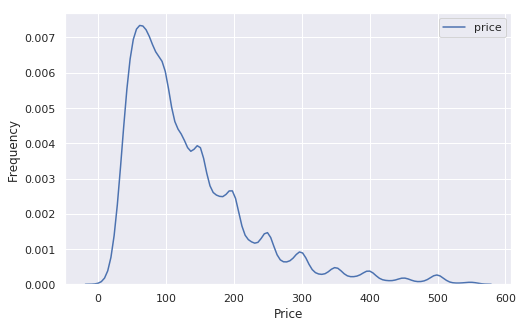

In [163]:
plt.figure(figsize=(8, 5))
sns.kdeplot(test_0.price)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

### Frequency of price for cluster_1

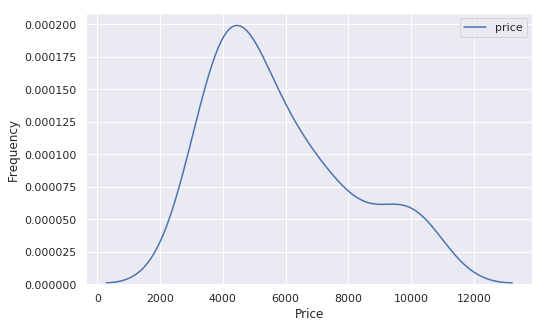

In [164]:
plt.figure(figsize=(8, 5))
sns.kdeplot(test_1.price)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

### Frequency of price for cluster_2

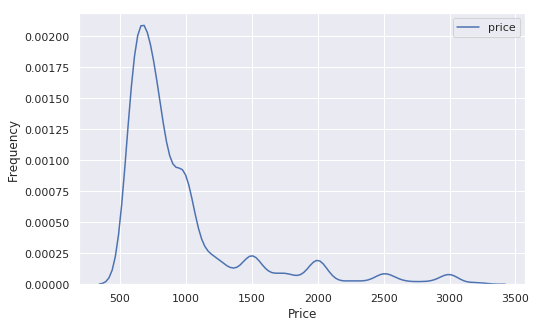

In [165]:
plt.figure(figsize=(8, 5))
sns.kdeplot(test_2.price)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [166]:
print("cluster")
print("mean", cluster_0.price.mean())
print("std", cluster_0.price.std())
print("min", cluster_0.price.min())
print("max", cluster_0.price.max())

cluster
mean 132.48881282350976
std 90.05980054092642
min 10
max 550


In [167]:
# stats.normaltest(cluster_0.price.values)

In [168]:
cluster_0.price.mean()

132.48881282350976

### Make 3 cluster for cluster_0

In [169]:
kmeans = KMeans(n_clusters=3, max_iter=300)
kmeans.fit(cluster_0.price.values.reshape(-1,1))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [170]:
kmeans.cluster_centers_

array([[ 77.78074164],
       [358.25745885],
       [184.57482732]])

In [171]:
cluster_0['low_price_label'] = kmeans.labels_

/home/alireza/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [172]:
# cluster_0[cluster_0.low_price_label == 1].low_price_label = 3
# cluster_0[cluster_0.low_price_label == 2].low_price_label = 1
# cluster_0[cluster_0.low_price_label == 3].low_price_label = 2

In [173]:
cluster_0[cluster_0.low_price_label == 0].price.describe()

count    29691.000000
mean        77.780742
std         27.657951
min         10.000000
25%         55.000000
50%         75.000000
75%        100.000000
max        131.000000
Name: price, dtype: float64

In [174]:
cluster_0[cluster_0.low_price_label == 1].price.describe()

count    3888.000000
mean      358.257459
std        73.379913
min       272.000000
25%       300.000000
50%       349.000000
75%       400.000000
max       550.000000
Name: price, dtype: float64

In [175]:
cluster_0[cluster_0.low_price_label == 2].price.describe()

count    14333.000000
mean       184.574827
std         36.436127
min        132.000000
25%        150.000000
50%        179.000000
75%        200.000000
max        271.000000
Name: price, dtype: float64

<Figure size 1440x864 with 0 Axes>

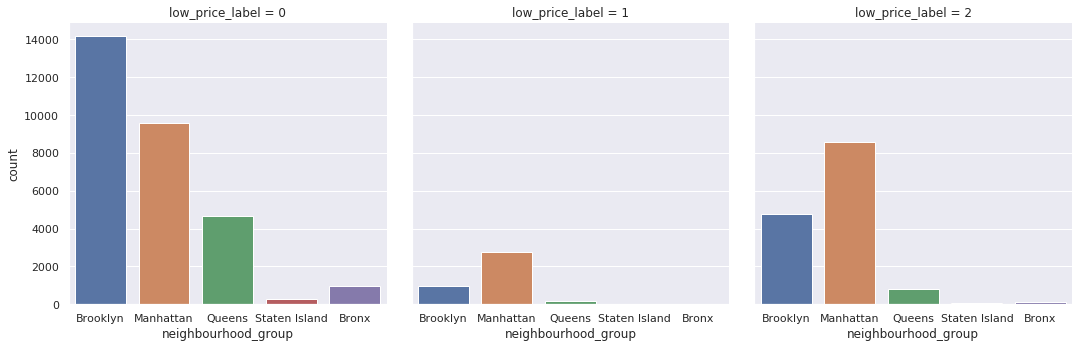

In [176]:
plt.figure(figsize=(20, 12))
sns.catplot(x='neighbourhood_group',col='low_price_label', kind='count', data=cluster_0)
plt.show()

## let's explore id

In [5]:
data.corr()['host_id']

id                                0.588290
host_id                           1.000000
latitude                          0.020224
longitude                         0.127055
price                             0.015309
minimum_nights                   -0.017364
number_of_reviews                -0.140106
reviews_per_month                 0.296417
calculated_host_listings_count    0.154950
availability_365                  0.203492
Name: host_id, dtype: float64

طبق تجربه ی ک توی ایدی دادن دیتا بیسا توی کارای مختلفمون داشتیم 
خواستیم ی بررسی بکنیم که ببینیم نکته ای از اون قبیل میتونیم در بیاریم 
سیستم ایدی دهی دیتا بیسا نکته خاصی نداره فقط ایدی هایی که اول وارد سیستم میشن معمولا ایدی پایین تری دارن ینی از روی ایدی میشه فهمید که اولین کاربرا چ نوع افرادی بودن 
اولین کاربران اکثرا توی طول جغرافیایی بیشتر بودن ینی طرفای منهتن اول همه گیر شده و با توجه به نکته هایی که در مورد نوع منهتن در اوریم خیلی منطقیه که اول جایی که نیاز سیستم بیشتر بوده کاربرا بیشتر بیان
دردسترس بودن در طول سال هم رابطه نسبی داره پس بازم میتونیم بگیم حرفی که زدیم مبنی بر اینکه اول وقتی سیستم اماده ب کار شده رفته با افرادی که توی این کار بودن و توی اجاره دادن خونه بودن قرارداد بسته 
حالا ۲ تا حالت داره یا سیستم رو وقتی زدن اون افراد که توی این کار بودن رو جذب کردن یا بنیان گذارای این سیستم خودشون توی این کار بودن و میخواستن ی سیستم بسازن که کل بازار کارشونو بگیرن و گسترده ترش کنن 
بخاطر همین که مشتریای ثابت داشتن این افراد ریویو هایی که میگیرفتن هم بالا تر بوده 
